In [1]:
import pandas as pd

In [2]:
path = "COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
data = pd.read_csv(path)

In [3]:
data_t = data.T
data_t.columns = data_t.iloc[1, :].astype(str) + '_' +  data_t.iloc[0, :].astype(str)
data_t = data_t.iloc[4:]
data_t = data_t.reset_index()
data_t['date'] = pd.to_datetime(data_t['index'])
data_t.columns = data_t.columns.str.replace(" ","_")
data_t.columns = data_t.columns.str.replace(",","_")
data_t = data_t.drop(['index', ], axis=1)
data_t = data_t.set_index('date')

In [4]:
data_t.head()

Mainland_China_Anhui Mainland_China_Beijing  \
date                                                     
2020-01-22                    1                     14   
2020-01-23                    9                     22   
2020-01-24                   15                     36   
2020-01-25                   39                     41   
2020-01-26                   60                     68   

           Mainland_China_Chongqing Mainland_China_Fujian  \
date                                                        
2020-01-22                        6                     1   
2020-01-23                        9                     5   
2020-01-24                       27                    10   
2020-01-25                       57                    18   
2020-01-26                       75                    35   

           Mainland_China_Gansu Mainland_China_Guangdong  \
date                                                       
2020-01-22                    0                       26   
2020-01-23                    2                       32   
2020-01-24                    2                       53   
2020-01-25                    4                       78   
2020-01-26                    7                      111   

           Mainland_China_Guangxi Mainland_China_Guizhou  \
date                                                       
2020-01-22                      2                      1   
2020-01-23                      5                      3   
2020-01-24                     23                      3   
2020-01-25                     23                      4   
2020-01-26                     36                      5   

           Mainland_China_Hainan Mainland_China_Hebei  ... Switzerland_nan  \
date                                                   ...                   
2020-01-22                     4                    1  ...               0   
2020-01-23                     5                    1  ...               0   
2020-01-24                     8                    2  ...               0   
2020-01-25                    19                    8  ...               0   
2020-01-26                    22                   13  ...               0   

           Austria_nan Israel_nan Pakistan_nan Brazil_nan Georgia_nan  \
date                                                                    
2020-01-22           0          0            0          0           0   
2020-01-23           0          0            0          0           0   
2020-01-24           0          0            0          0           0   
2020-01-25           0          0            0          0           0   
2020-01-26           0          0            0          0           0   

           Greece_nan North_Macedonia_nan Norway_nan Romania_nan  
date                                                              
2020-01-22          0                   0          0           0  
2020-01-23          0                   0          0           0  
2020-01-24          0                   0          0           0  
2020-01-25          0                   0          0           0  
2020-01-26          0                   0          0           0  

[5 rows x 101 columns]

In [5]:
data_china = data[data['Country/Region'] == 'Mainland China'].T
data_china = data_china.sum(axis=1)
data_china = data_china.iloc[4:]
data_china = data_china.rename('China_total')

In [6]:
data_all= pd.concat([data_t, data_china], axis=1)
melted = pd.melt(data_all)
size = len(melted['variable'].unique())
index = ([data_all.index.to_list()] * size)
flat_index = [item for sublist in index for item in sublist]
full_df = pd.concat([melted, pd.DataFrame(flat_index, columns=['date'])], axis=1)
full_df.to_csv('corona_confirmed_formated.csv', index=False)
full_df.head()

variable value       date
0  Mainland_China_Anhui     1 2020-01-22
1  Mainland_China_Anhui     9 2020-01-23
2  Mainland_China_Anhui    15 2020-01-24
3  Mainland_China_Anhui    39 2020-01-25
4  Mainland_China_Anhui    60 2020-01-26

## Automaticaly fit sigmoid

In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()
sns.set_style("whitegrid")
sns.set_style("ticks")


In [7]:
non_china_non_cruise = ['Thailand_nan', 'Japan_nan',
       'South_Korea_nan', 'Taiwan_Taiwan', 'US_Seattle__WA',
       'US_Chicago__IL', 'US_Tempe__AZ', 'Macau_Macau',
       'Hong_Kong_Hong_Kong', 'Singapore_nan', 'Vietnam_nan',
       'France_nan', 'Nepal_nan', 'Malaysia_nan', 'Canada_Toronto__ON',
       'Canada_British_Columbia', 'US_Orange__CA', 'US_Los_Angeles__CA',
       'Australia_New_South_Wales', 'Australia_Victoria',
       'Australia_Queensland', 'Cambodia_nan', 'Sri_Lanka_nan',
       'Germany_nan', 'Finland_nan', 'United_Arab_Emirates_nan',
       'Philippines_nan', 'India_nan', 'Canada_London__ON', 'Italy_nan',
       'UK_nan', 'Russia_nan', 'Sweden_nan', 'US_Santa_Clara__CA',
       'Spain_nan', 'Australia_South_Australia', 'US_Boston__MA',
       'US_San_Benito__CA', 'Belgium_nan', 'US_Madison__WI',
       'US_San_Diego_County__CA',
       'US_San_Antonio__TX', 'Egypt_nan', 'US_Omaha__NE']

non_hubei = ['Mainland_China_Anhui', 'Mainland_China_Beijing',
       'Mainland_China_Chongqing', 'Mainland_China_Fujian',
       'Mainland_China_Gansu', 'Mainland_China_Guangdong',
       'Mainland_China_Guangxi', 'Mainland_China_Guizhou',
       'Mainland_China_Hainan', 'Mainland_China_Hebei',
       'Mainland_China_Heilongjiang', 'Mainland_China_Henan',
        'Mainland_China_Hunan',
       'Mainland_China_Inner_Mongolia', 'Mainland_China_Jiangsu',
       'Mainland_China_Jiangxi', 'Mainland_China_Jilin',
       'Mainland_China_Liaoning', 'Mainland_China_Ningxia',
       'Mainland_China_Qinghai', 'Mainland_China_Shaanxi',
       'Mainland_China_Shandong', 'Mainland_China_Shanghai',
       'Mainland_China_Shanxi', 'Mainland_China_Sichuan',
       'Mainland_China_Tianjin', 'Mainland_China_Tibet',
       'Mainland_China_Xinjiang', 'Mainland_China_Yunnan',
       'Mainland_China_Zhejiang', ]

hubei = ['Mainland_China_Hubei']

cruise = ['Others_Diamond_Princess_cruise_ship']

def get_X_vector(df, columns):
    X = full_df[full_df['variable'].isin(columns)]
    X = X.set_index('date')
    X = X.resample('D').sum()['value']
    return X.values

X_non_hubei = get_X_vector(full_df, non_hubei)
X_non_china_non_cruise = get_X_vector(full_df, non_china_non_cruise)
X_hubei = get_X_vector(full_df, hubei)
X_cruise = get_X_vector(full_df, cruise)

In [8]:
rest_of_the_world = list(set(data_t.columns) - set(non_hubei) - set(hubei))

In [9]:
X_rest_of_the_world = get_X_vector(full_df, rest_of_the_world)

In [10]:
import numpy
import scipy
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings
from matplotlib import dates


class SimoidOptimizer():

    def __init__(self, yData, number_of_days_to_predict, title='', test_days=2, start_date = '2020-01-22', *kwargs):
        self.yData = yData
        self.xData = np.linspace(0, len(self.yData), len(self.yData+1))
        self.number_of_days = number_of_days_to_predict
        self.title = title
        self.test_days = test_days
        self.start_date = start_date
        

    def sigmoid(self, x, amplitude, x0, k):
        return amplitude * 1.0/(1.0+numpy.exp(-x0*(x-k)))

    def sumOfSquaredError(self, parameterTuple):
        # function for genetic algorithm to minimize (sum of squared error)
        # do not print warnings by genetic algorithm
        warnings.filterwarnings("ignore")
        val = self.sigmoid(self.xData, *parameterTuple)
        return numpy.sum((self.yData - val) ** 2.0)

    def generate_Initial_Parameters(self):
        # min and max used for bounds
        maxX = max(self.xData)
        minX = min(self.xData)
        maxY = max(self.yData)
        minY = min(self.yData)

        parameterBounds = []
        parameterBounds.append([minY, maxY])  # search bounds for amplitude
        parameterBounds.append([minX, maxX])  # search bounds for x0
        parameterBounds.append([minX, maxX])  # search bounds for k

        # "seed" the numpy random number generator for repeatable results
        result = differential_evolution(
            self.sumOfSquaredError, parameterBounds, seed=3)
        return result.x

    def fit(self):
        # by default, differential_evolution completes by calling curve_fit() using parameter bounds
        geneticParameters = self.generate_Initial_Parameters()

        # now call curve_fit without passing bounds from the genetic algorithm,
        # just in case the best fit parameters are aoutside those bounds
        if self.test_days != 0:
            self.fittedParameters, pcov = curve_fit(self.sigmoid, self.xData[:-self.test_days],
                                                    self.yData[:-self.test_days], geneticParameters, maxfev=10000)
        else:
            self.fittedParameters, pcov = curve_fit(self.sigmoid, self.xData,
                                                    self.yData, geneticParameters)
        print('Fitted parameters:', self.fittedParameters)

        modelPredictions = self.sigmoid(self.xData, *self.fittedParameters)
        

        absError = modelPredictions - self.yData
        SE = numpy.square(absError)  # squared errors
        MSE = numpy.mean(SE)  # mean squared errors
        RMSE = numpy.sqrt(MSE)  # Root Mean Squared Error, RMSE
        Rsquared = 1.0 - (numpy.var(absError) / numpy.var(self.yData))
        print('RMSE:', RMSE)
        print('R-squared:', Rsquared)

    def predict(self):
        xModel = numpy.linspace(0, self.number_of_days, self.number_of_days+1)
        
        yModel = self.sigmoid(xModel, *self.fittedParameters)
        index_sig = pd.date_range(self.start_date, periods=self.number_of_days+1)
        model = pd.Series(yModel)
        model.index = index_sig
        
        if self.test_days != 0:
            actual_cases = pd.Series(self.yData[:-self.test_days])
            index_actual = pd.date_range(
                self.start_date, periods=len(self.yData[:-self.test_days]))
            actual_cases.index = index_actual

            non_trained_cases = pd.Series(self.yData[-self.test_days:])
            start_non_trained = (
                index_actual[-1] + pd.Timedelta(1, 'D')).strftime("%Y-%m-%d")
            index_non_trained = pd.date_range(
                start_non_trained, periods=self.test_days)
            non_trained_cases.index = index_non_trained

            self.non_trained_cases = non_trained_cases
            self.actual_cases = actual_cases
            self.model = model
        else:
            actual_cases = pd.Series(self.yData)
            index_actual = pd.date_range(
                self.start_date, periods=len(self.yData))
            actual_cases.index = index_actual
            
            self.actual_cases = actual_cases
            self.model = model

    def ModelAndScatterPlot(self):
        # now the model as a line plot
        ax = self.model.plot(figsize=(25, 10), linewidth=7, color='#65cccc', x_compat=True)

        # first the raw data as a scatter plot
        self.actual_cases.plot(style='o', ms=12, c='#ff0066', ax=ax)

        # non trained plot
        if self.test_days != 0:
            self.non_trained_cases.plot(style='o', ms=12, c='#002244ff', ax=ax)

        
        
        #ax.set_ylabel('confirmed cases\n', fontsize=30)  # Y axis data label
        #ax.set_title(self.title, fontsize=20)
        ax.legend(['simulation', 'actual used to train the model',
                   'actual after simulation date'], prop={'size': 25})

        # graphics output section
        plt.rcParams["figure.dpi"] = 300
        if self.test_days != 0:
            maxi_ax = max(max(self.model.values * 1.1), max(self.non_trained_cases.values)*1.1)
        else:
            maxi_ax = max(self.model.values * 1.1)
        ax.set_ylim((0, maxi_ax))
        
        # Set major ticks with month names
        ax.xaxis.set_major_locator(dates.MonthLocator(interval=5))
        ax.xaxis.set_major_formatter(dates.DateFormatter(''))
        ax.xaxis.set_minor_locator(dates.DayLocator(interval=9))
        ax.xaxis.set_minor_formatter(dates.DateFormatter('\n%d %b'))
        
        ax.xaxis.grid(True, which='both')
        ax.yaxis.grid(True, which="major")
        
        ax.get_xaxis().set_tick_params(which='minor', labelsize=20)
        ax.tick_params(axis='y', labelsize=20)
        
        plt.show()
        plt.close('all')  # clean up after using pyplot

        return ax


In [11]:
X_non_china_non_cruise

array([   8,   14,   25,   35,   56,   64,   84,   96,  110,  144,  167,
        180,  188,  212,  227,  265,  256,  282,  297,  322,  341,  348,
        363,  377,  400,  425,  442,  457,  472,  561,  693,  986, 1284,
       1613, 1879, 2349])

In [12]:
X_rest_of_the_world

array([   8,   14,   25,   35,   56,   64,   84,   96,  110,  144,  167,
        180,  188,  212,  227,  265,  317,  343,  361,  457,  476,  523,
        538,  595,  685,  780,  896,  999, 1095, 1200, 1371, 1677, 2047,
       2418, 2755, 3332])

In [17]:
sig_hubei = SimoidOptimizer(X_hubei, 60, title='Hubei', test_days=7)
sig_hubei.fit()
sig_hubei.predict()

sig_world = SimoidOptimizer(X_non_china_non_cruise, number_of_days_to_predict=60, test_days=7)
sig_world.fit()
sig_world.predict()

sig_world_2 = SimoidOptimizer(X_rest_of_the_world[-6:], number_of_days_to_predict=60 - (len(X_non_china_non_cruise) - 5), test_days=2, start_date='2020-02-21')
sig_world_2.fit()
sig_world_2.predict()

sig_world_3 = SimoidOptimizer(X_non_china_non_cruise[-6:], number_of_days_to_predict=60 - (len(X_non_china_non_cruise) - 5), test_days=2, start_date='2020-02-21')
sig_world_3.fit()
sig_world_3.predict()

sig_china = SimoidOptimizer(X_non_hubei, number_of_days_to_predict=60, 
                      title = 'China, except Hubei', test_days=7)
sig_china.fit()
sig_china.predict()

shift = 11
date = full_df[full_df['variable'] == 'Others_Diamond_Princess_cruise_ship'][shift:]['date'].iloc[0].strftime("%Y-%m-%d")
sig_cruise = SimoidOptimizer(X_cruise[shift:], number_of_days_to_predict=60, 
                      title = 'Diamond cruise', test_days=7, start_date=date)
sig_cruise.fit()
sig_cruise.predict()

Fitted parameters: [7.71433254e+04 2.01388760e-01 2.07266634e+01]
RMSE: 3802.6564795532167
R-squared: 0.9803984669053871
Fitted parameters: [5.03936052e+02 1.66217640e-01 1.58445145e+01]
RMSE: 461.9829979495407
R-squared: 0.3360971579308899
Fitted parameters: [5.37875213e+03 2.43097872e-01 4.42677989e+00]
RMSE: 59.73106588139057
R-squared: 0.9921428703137237
Fitted parameters: [2.63769080e+03 4.09179310e-01 2.50004139e+00]
RMSE: 90.20695872778998
R-squared: 0.9770436620753852
Fitted parameters: [1.25387908e+04 2.60943318e-01 1.25723907e+01]
RMSE: 232.76523641695945
R-squared: 0.9975342611122984
Fitted parameters: [1.55606713e+03 2.52928270e-01 1.92644125e+01]
RMSE: 199.27428626165076
R-squared: 0.5927798463781644


In [15]:
dic_sig = {'Hubei': sig_hubei,
           'Non Hubei': sig_china,
           'Rest of World': sig_world}
dic_colors = {'Hubei': '#65cccc',
              'Non Hubei': '#ff0066',
              'Rest of World': '#002244ff'}

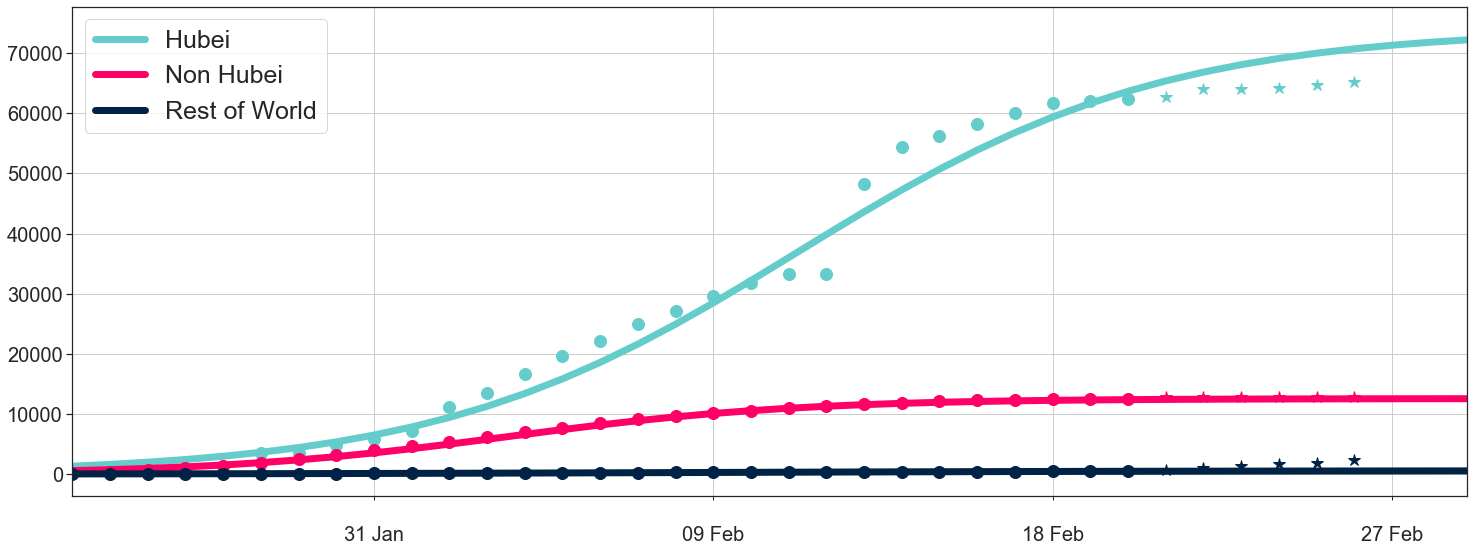

In [16]:
fig, ax = plt.subplots(figsize = (25, 10))

tab_lines = []
tab_labels = []

for str_sig in dic_sig:
    
    sig = dic_sig[str_sig]
    color = dic_colors[str_sig]
    
    line, = ax.plot(sig.model, linewidth=7, color=color, label=str_sig)
    
    tab_lines.append(line)
    tab_labels.append(str_sig)
    
    # first the raw data as a scatter plot
    (sig.actual_cases).plot(style='o', ms=12, c=color, ax=ax)

    # non trained plot
    (sig.non_trained_cases).plot(style='*', ms=12, c=color, ax=ax)

# ax.axvline(x=pd.Timestamp('2020-02-24'))

ax.legend(tab_lines, tab_labels, prop={'size': 25})

# graphics output section
# maxi_ax = 1.1
# ax.set_ylim((0, maxi_ax))
        
# Set major ticks with month names
ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter(''))
ax.xaxis.set_minor_locator(dates.DayLocator(interval=9))
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n%d %b'))

ax.set_xlim((pd.Timestamp('2020-01-23'), pd.Timestamp('2020-02-29')))

ax.xaxis.grid(True, which='minor')
ax.yaxis.grid(True, which="major")

ax.get_xaxis().set_tick_params(which='minor', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

df_sig = pd.concat([sig_hubei.model, sig_world.model, 
                    sig_china.model], axis=1)
df_sig.columns = ['Hubei', 'China', 'World']
df_sig.index.name = 'date'
df_sig.to_csv('Comparison.csv')

In [26]:
fig.savefig('Comparison_absolute.png', dpi=300)

Fitted parameters: [7.17733674e+04 2.12936884e-01 1.99584043e+01]
RMSE: 2643.206361434273
R-squared: 0.9880410467737779
Fitted parameters: [7.19845270e+04 2.11846069e-01 1.99587637e+01]
RMSE: 2641.2716733381967
R-squared: 0.9880500939065628
Fitted parameters: [7.21971091e+04 2.10758832e-01 1.99593676e+01]
RMSE: 2639.776973371491
R-squared: 0.9880555644398314
Fitted parameters: [7.24111254e+04 2.09675226e-01 1.99602188e+01]
RMSE: 2638.715216149842
R-squared: 0.9880575091875179
Fitted parameters: [7.26265872e+04 2.08595305e-01 1.99613198e+01]
RMSE: 2638.0791390148415
R-squared: 0.9880559794713306


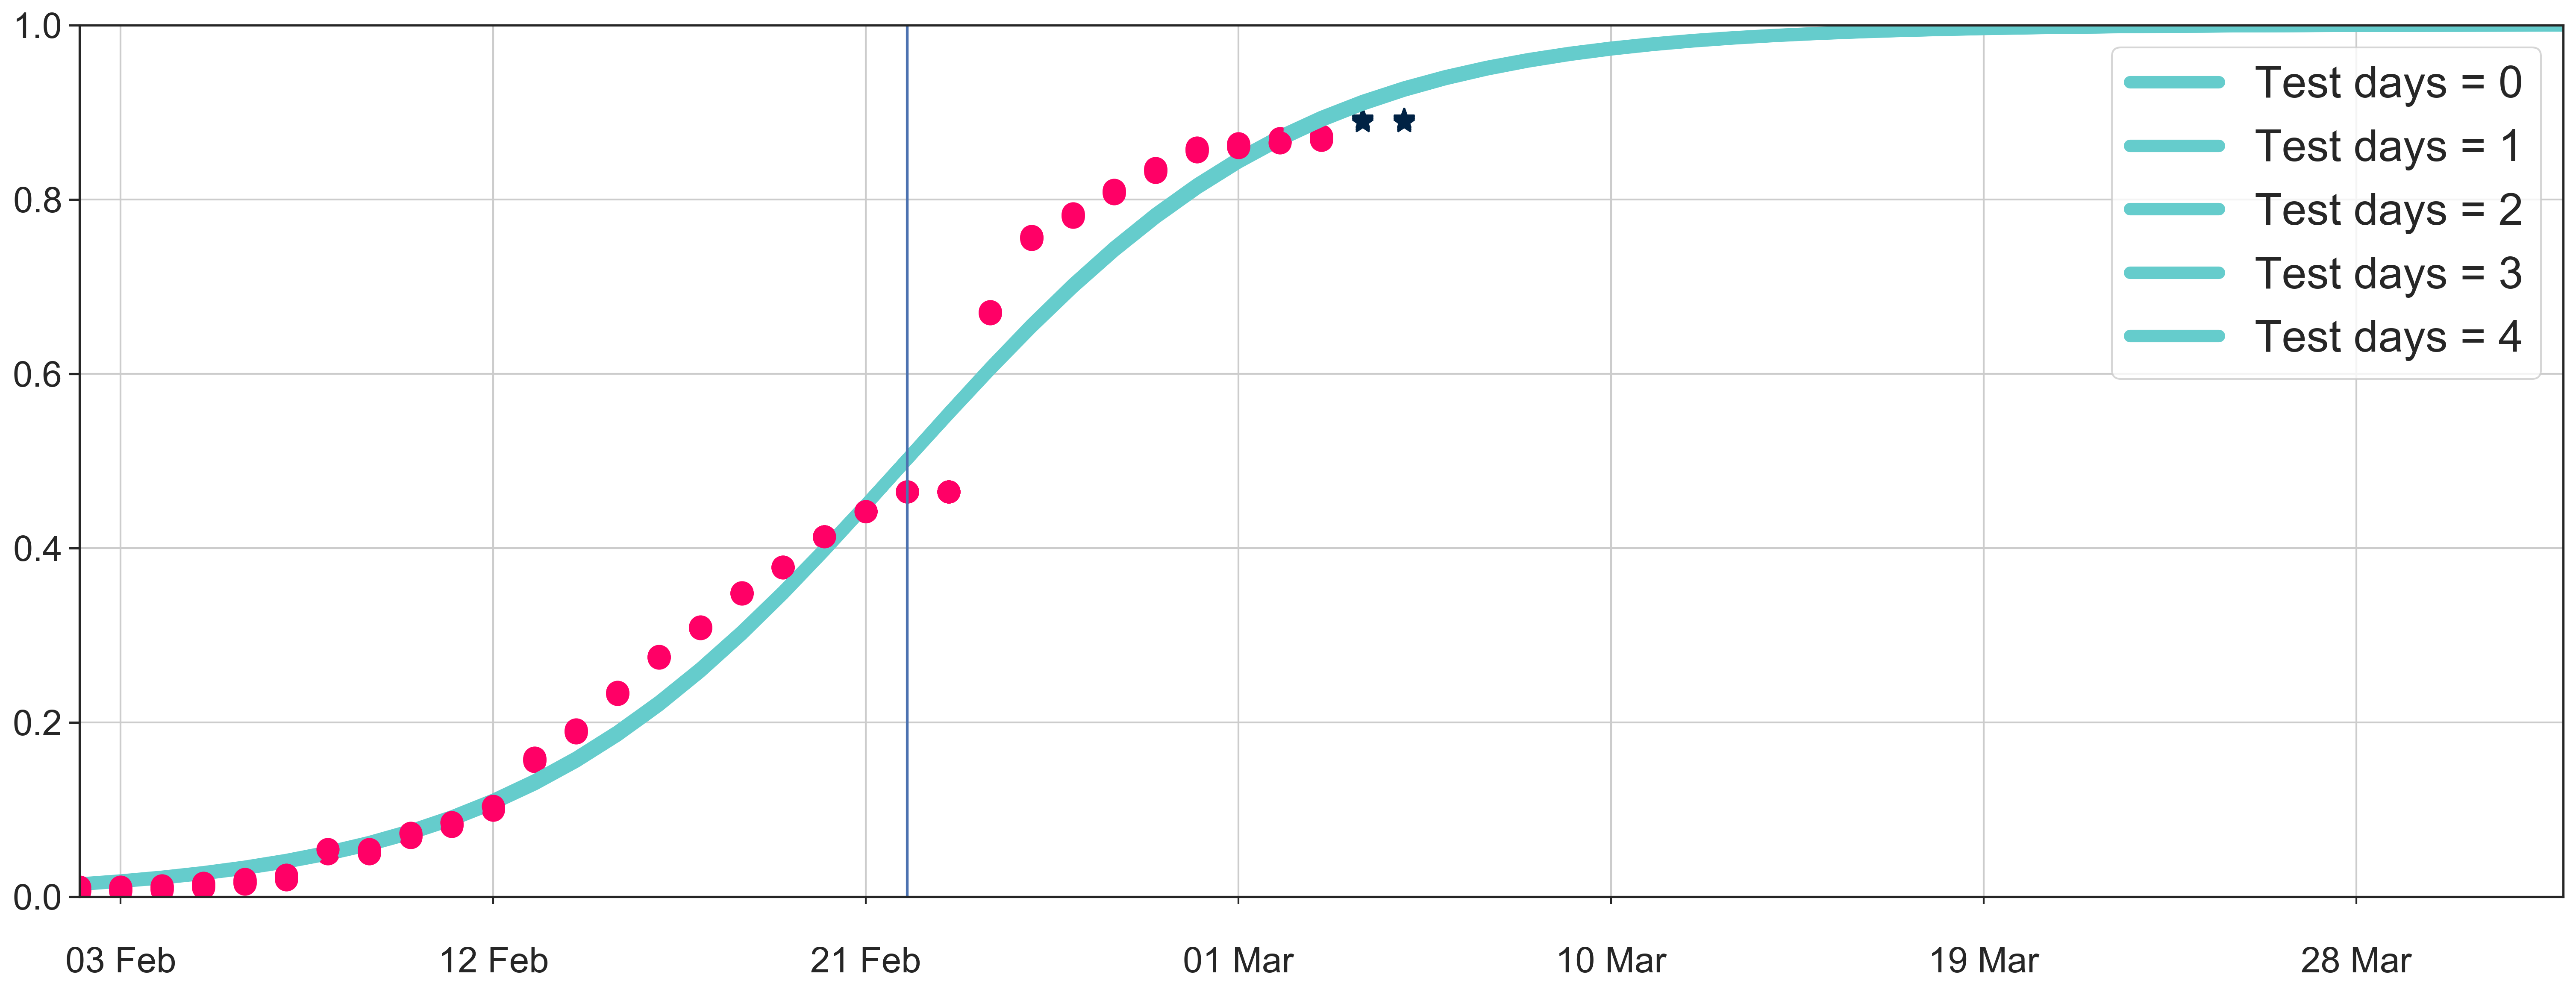

In [142]:
fig, ax = plt.subplots(figsize = (25, 10))

tab_lines = []
tab_labels = []

for i in range(5):
    
    sig = SimoidOptimizer(X_hubei + np.asarray([i * 100 for j in range(X_hubei.shape[0])]), number_of_days_to_predict=60, 
                      title = 'Hubei', test_days=2, start_date=date)
    sig.fit()
    sig.predict()
    
    line, = ax.plot(sig.model / max(sig.model), linewidth=7, color='#65cccc', label='Test days = ' + str(i))
    
    tab_lines.append(line)
    tab_labels.append('Test days = ' + str(i))
    
    # first the raw data as a scatter plot
    (sig.actual_cases / max(sig.model)).plot(style='o', ms=12, c='#ff0066', ax=ax)

    # non trained plot
    (sig.non_trained_cases / max(sig.model)).plot(style='*', ms=12, c='#002244ff', ax=ax)

ax.axvline(x=pd.Timestamp('2020-02-22'))

ax.legend(tab_lines, tab_labels, prop={'size': 25})

# graphics output section
maxi_ax = 1
ax.set_ylim((0, maxi_ax))
        
# Set major ticks with month names
ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter(''))
ax.xaxis.set_minor_locator(dates.DayLocator(interval=9))
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n%d %b'))

ax.xaxis.grid(True, which='minor')
ax.yaxis.grid(True, which="major")

ax.get_xaxis().set_tick_params(which='minor', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

In [71]:
fig.savefig('Comparison.png')

Fitted parameters: [7.71433254e+04 2.01388760e-01 2.07266634e+01]
RMSE: 3802.6564795532167
R-squared: 0.9803984669053871


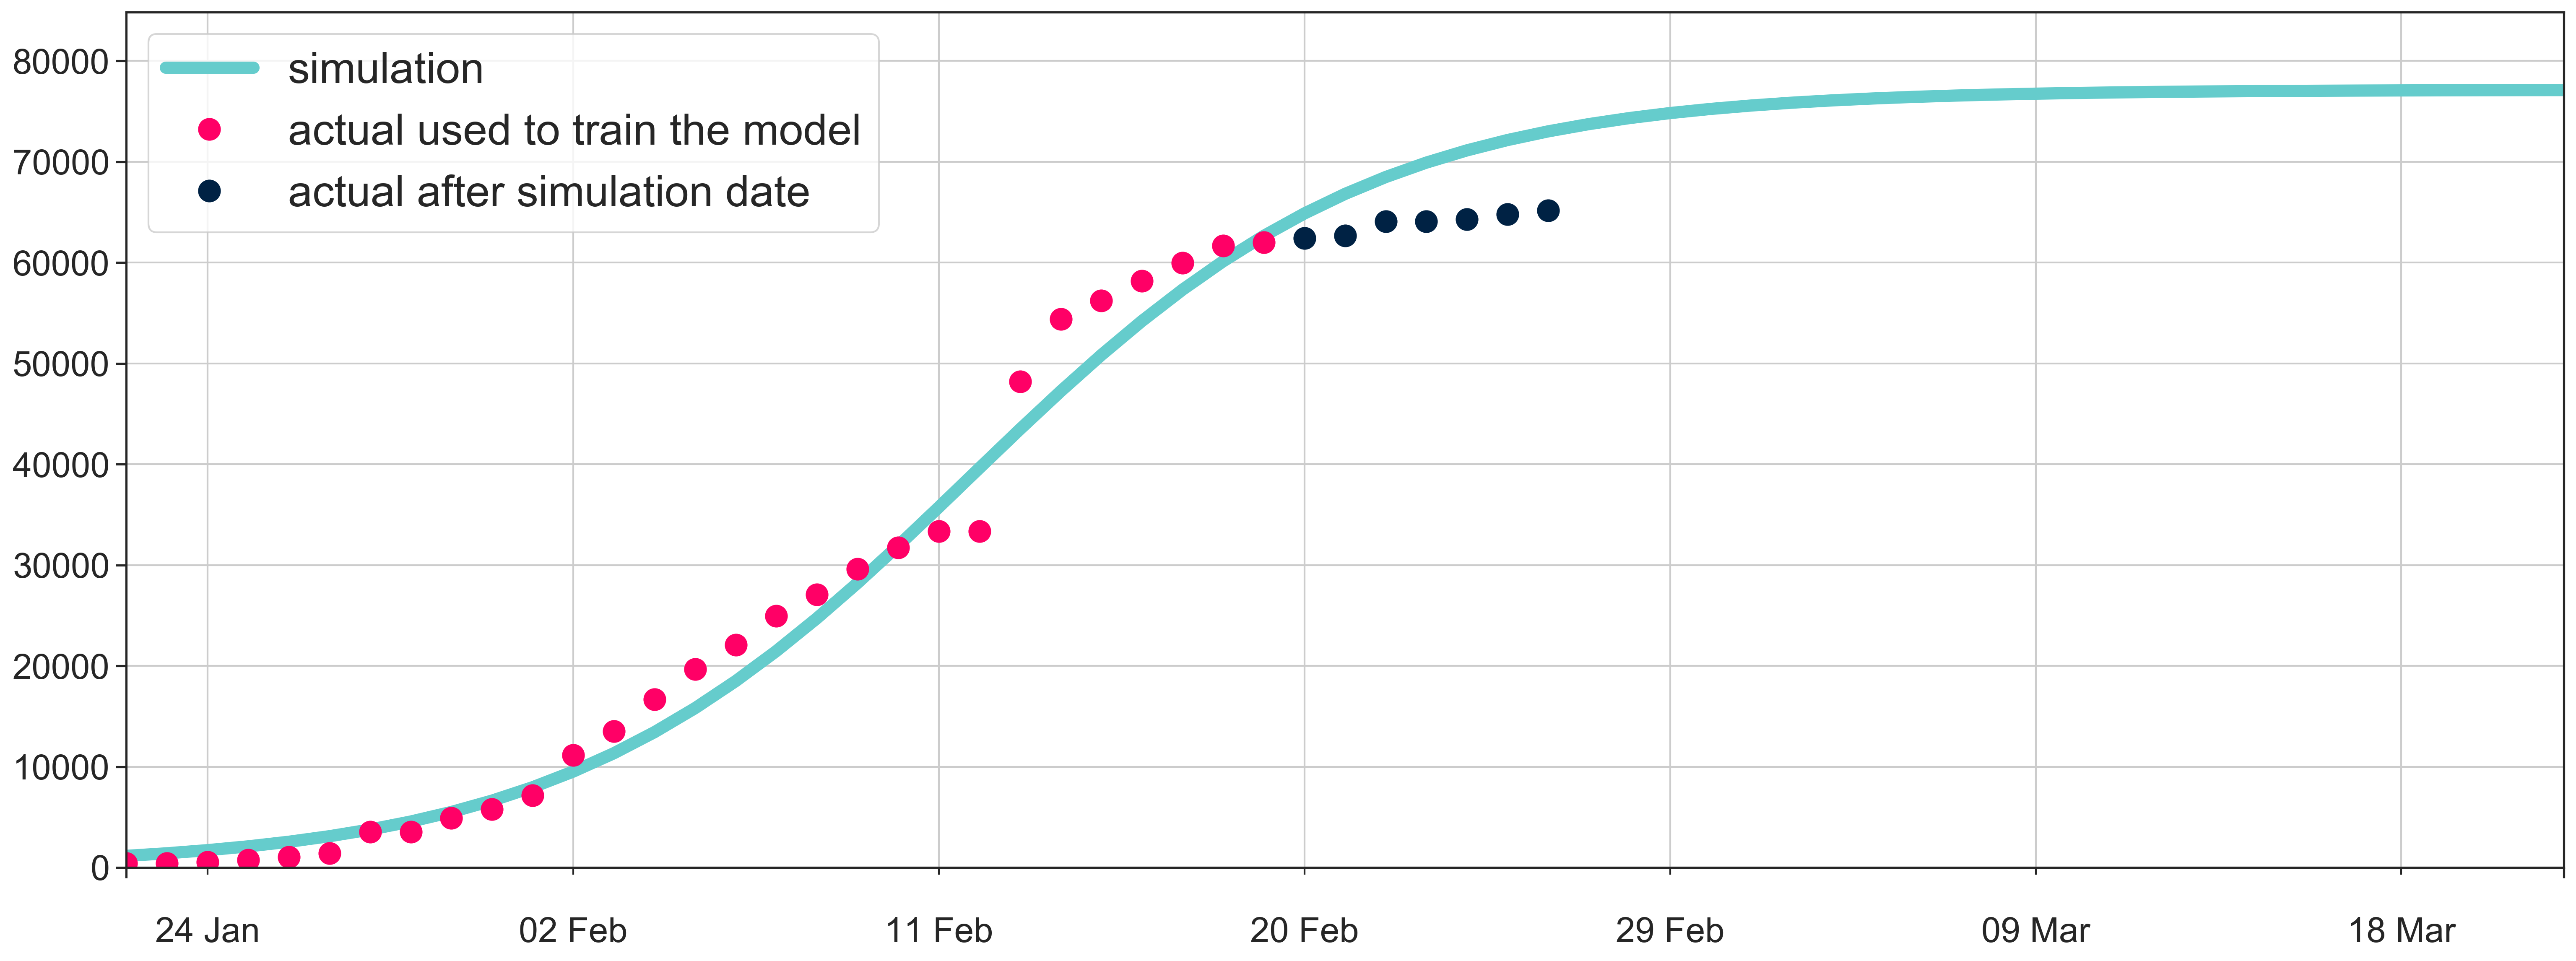

In [19]:
sig_hubei = SimoidOptimizer(X_hubei, 60, title='Hubei', test_days=7)
sig_hubei.fit()
sig_hubei.predict()
sig_hubei.ModelAndScatterPlot()

df_hubei = pd.concat([sig_hubei.model, sig_hubei.actual_cases, sig_hubei.non_trained_cases], axis=1)
df_hubei.columns = ['model', 'actual_case', 'non_trained_actual_case']
df_hubei.index.name = 'date'
df_hubei.to_csv('hubei_data.csv')

In [308]:
X_rest_of_the_world[-5:]

array([1371, 1677, 2047, 2418, 2755])

Fitted parameters: [5.37875213e+03 2.43097872e-01 4.42677989e+00]
RMSE: 59.73106588139057
R-squared: 0.9921428703137237


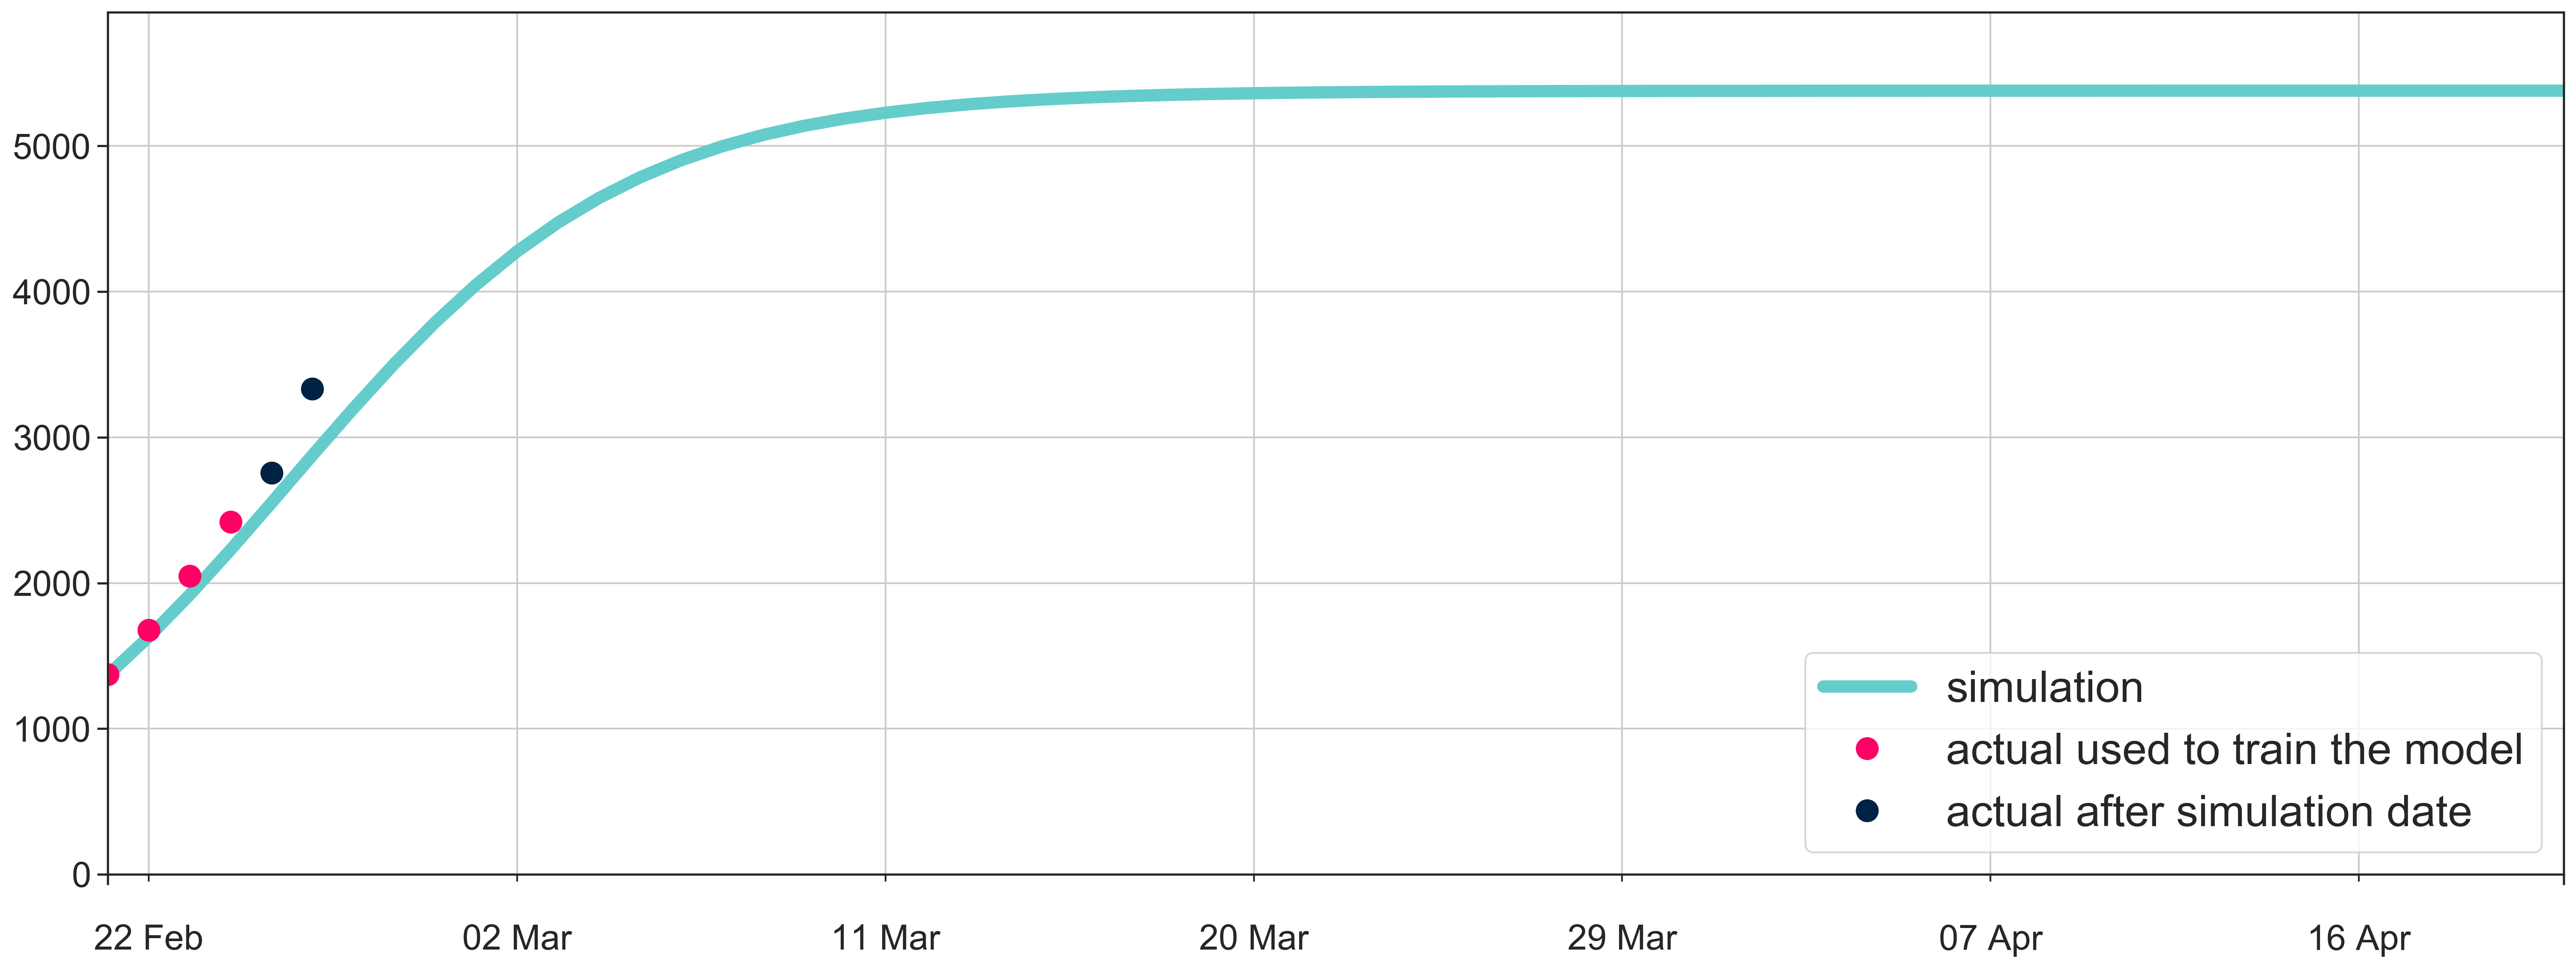

In [20]:
sig_non_china_non_cruise = SimoidOptimizer(X_rest_of_the_world[-6:], number_of_days_to_predict=60, test_days=2, start_date='2020-02-21')
sig_non_china_non_cruise.fit()
sig_non_china_non_cruise.predict()
sig_non_china_non_cruise.ModelAndScatterPlot()

df_non_china_non_cruise = pd.concat([sig_non_china_non_cruise.model, 
                                     sig_non_china_non_cruise.actual_cases, 
                                     sig_non_china_non_cruise.non_trained_cases], axis=1)
df_non_china_non_cruise.columns = ['model', 'actual_case', 'non_trained_actual_case']
df_non_china_non_cruise.index.name = 'date'
df_non_china_non_cruise.to_csv('non_china_non_cruise.csv')

Fitted parameters: [1.25387908e+04 2.60943318e-01 1.25723907e+01]
RMSE: 232.76523641695945
R-squared: 0.9975342611122984


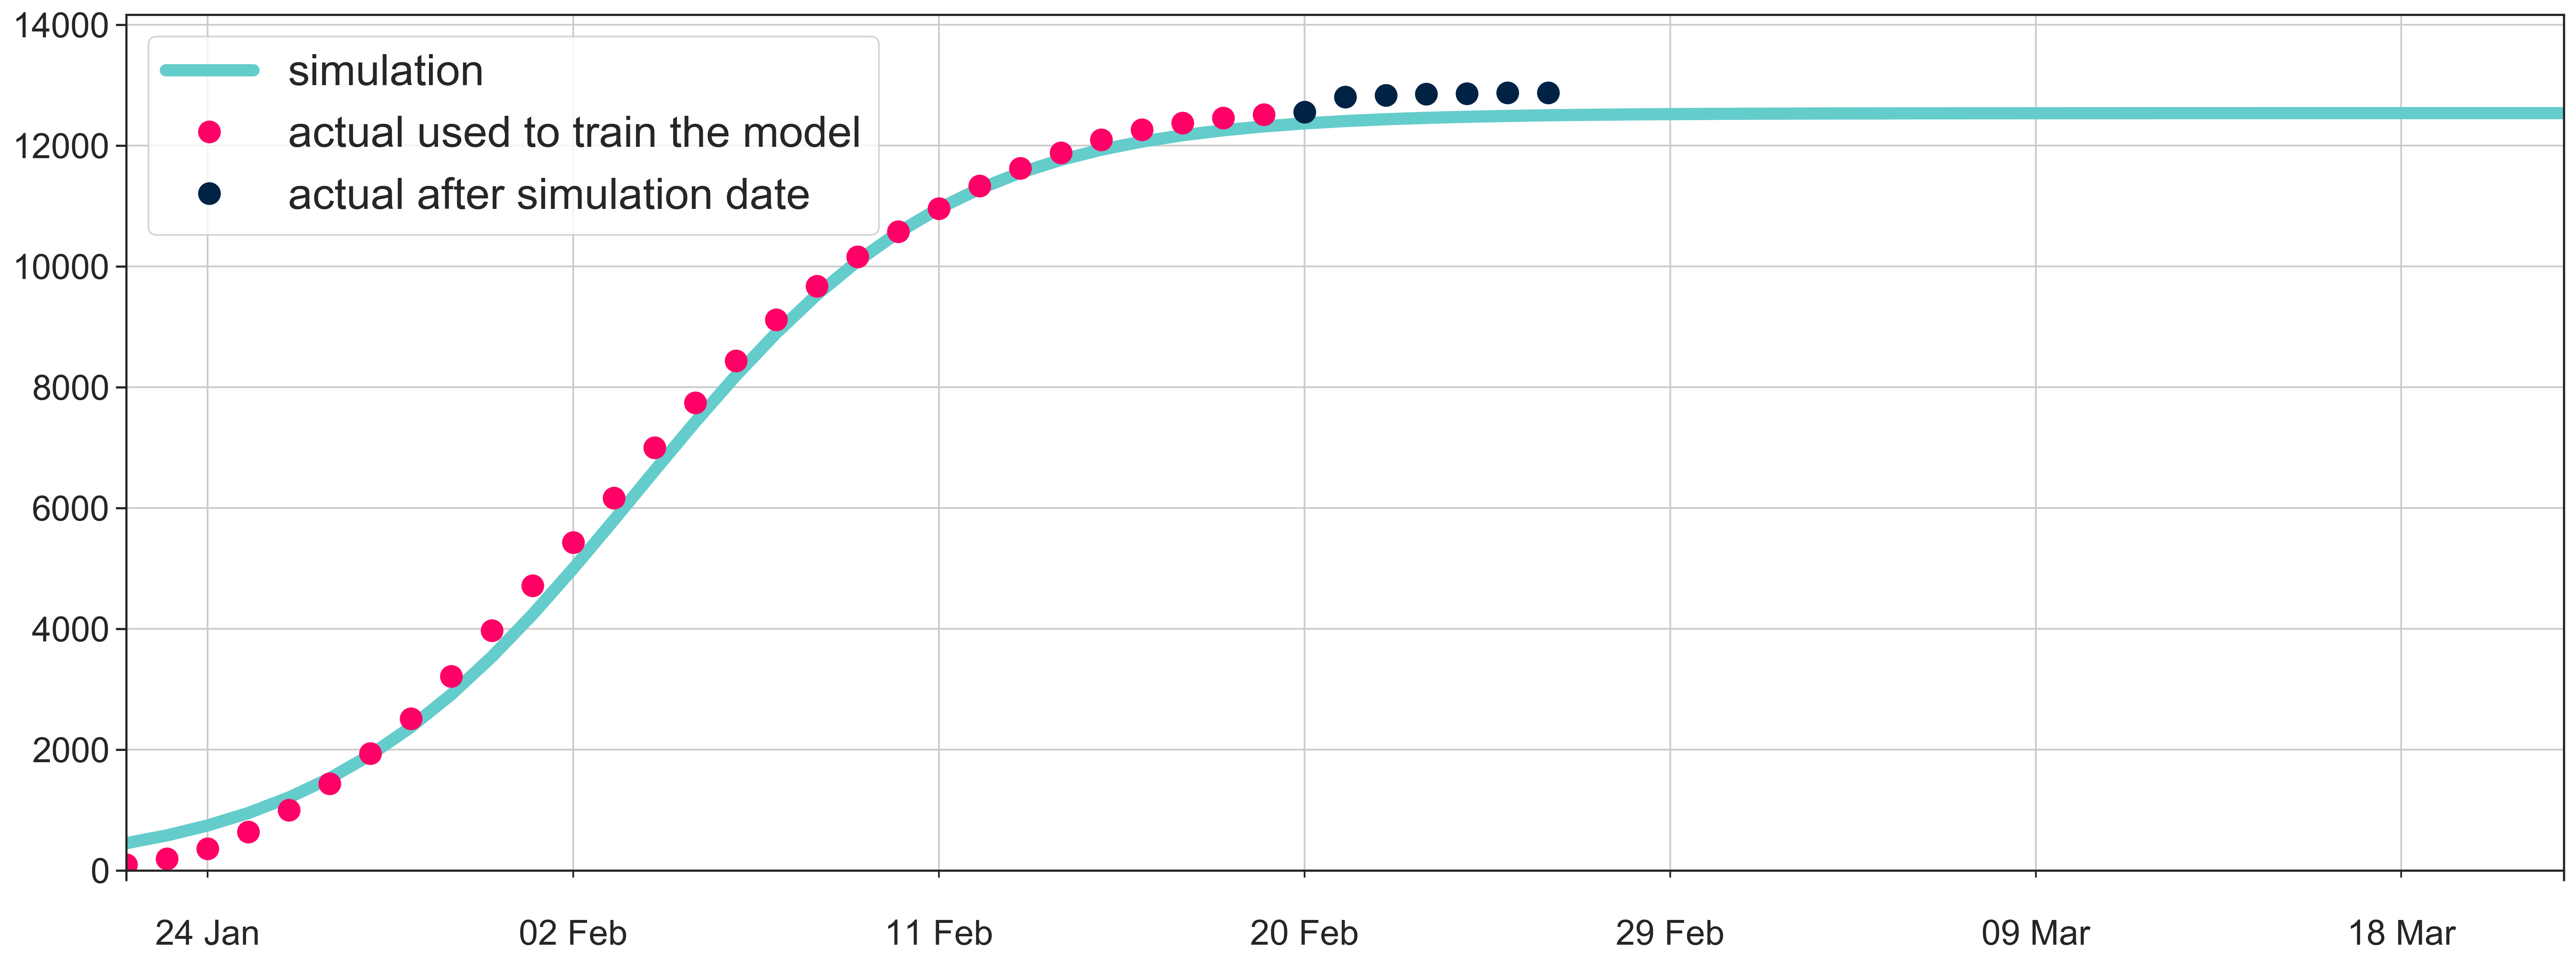

In [21]:
sig_non_hubei = SimoidOptimizer(X_non_hubei, number_of_days_to_predict=60, 
                      title = 'China, except Hubei', test_days=7)
sig_non_hubei.fit()
sig_non_hubei.predict()
sig_non_hubei.ModelAndScatterPlot()

df_non_hubei = pd.concat([sig_non_hubei.model, sig_non_hubei.actual_cases, sig_non_hubei.non_trained_cases], axis=1)
df_non_hubei.columns = ['model', 'actual_case', 'non_trained_actual_case']
df_non_hubei.index.name = 'date'
df_non_hubei.to_csv('China_non_hubei.csv')

In [236]:
date = full_df[full_df['variable'] == 'Others_Diamond_Princess_cruise_ship'][shift:]['date'].iloc[0].strftime("%Y-%m-%d")
sig_cruise_2 = SimoidOptimizer(X_cruise[shift:], number_of_days_to_predict=60, 
                      title = 'Diamond cruise', test_days=2, start_date=date)
sig_cruise_2.fit()
sig_cruise_2.predict()

Fitted parameters: [7.49037808e+02 3.41753715e-01 1.44465644e+01]
RMSE: 27.057122921964854
R-squared: 0.9896501099449393


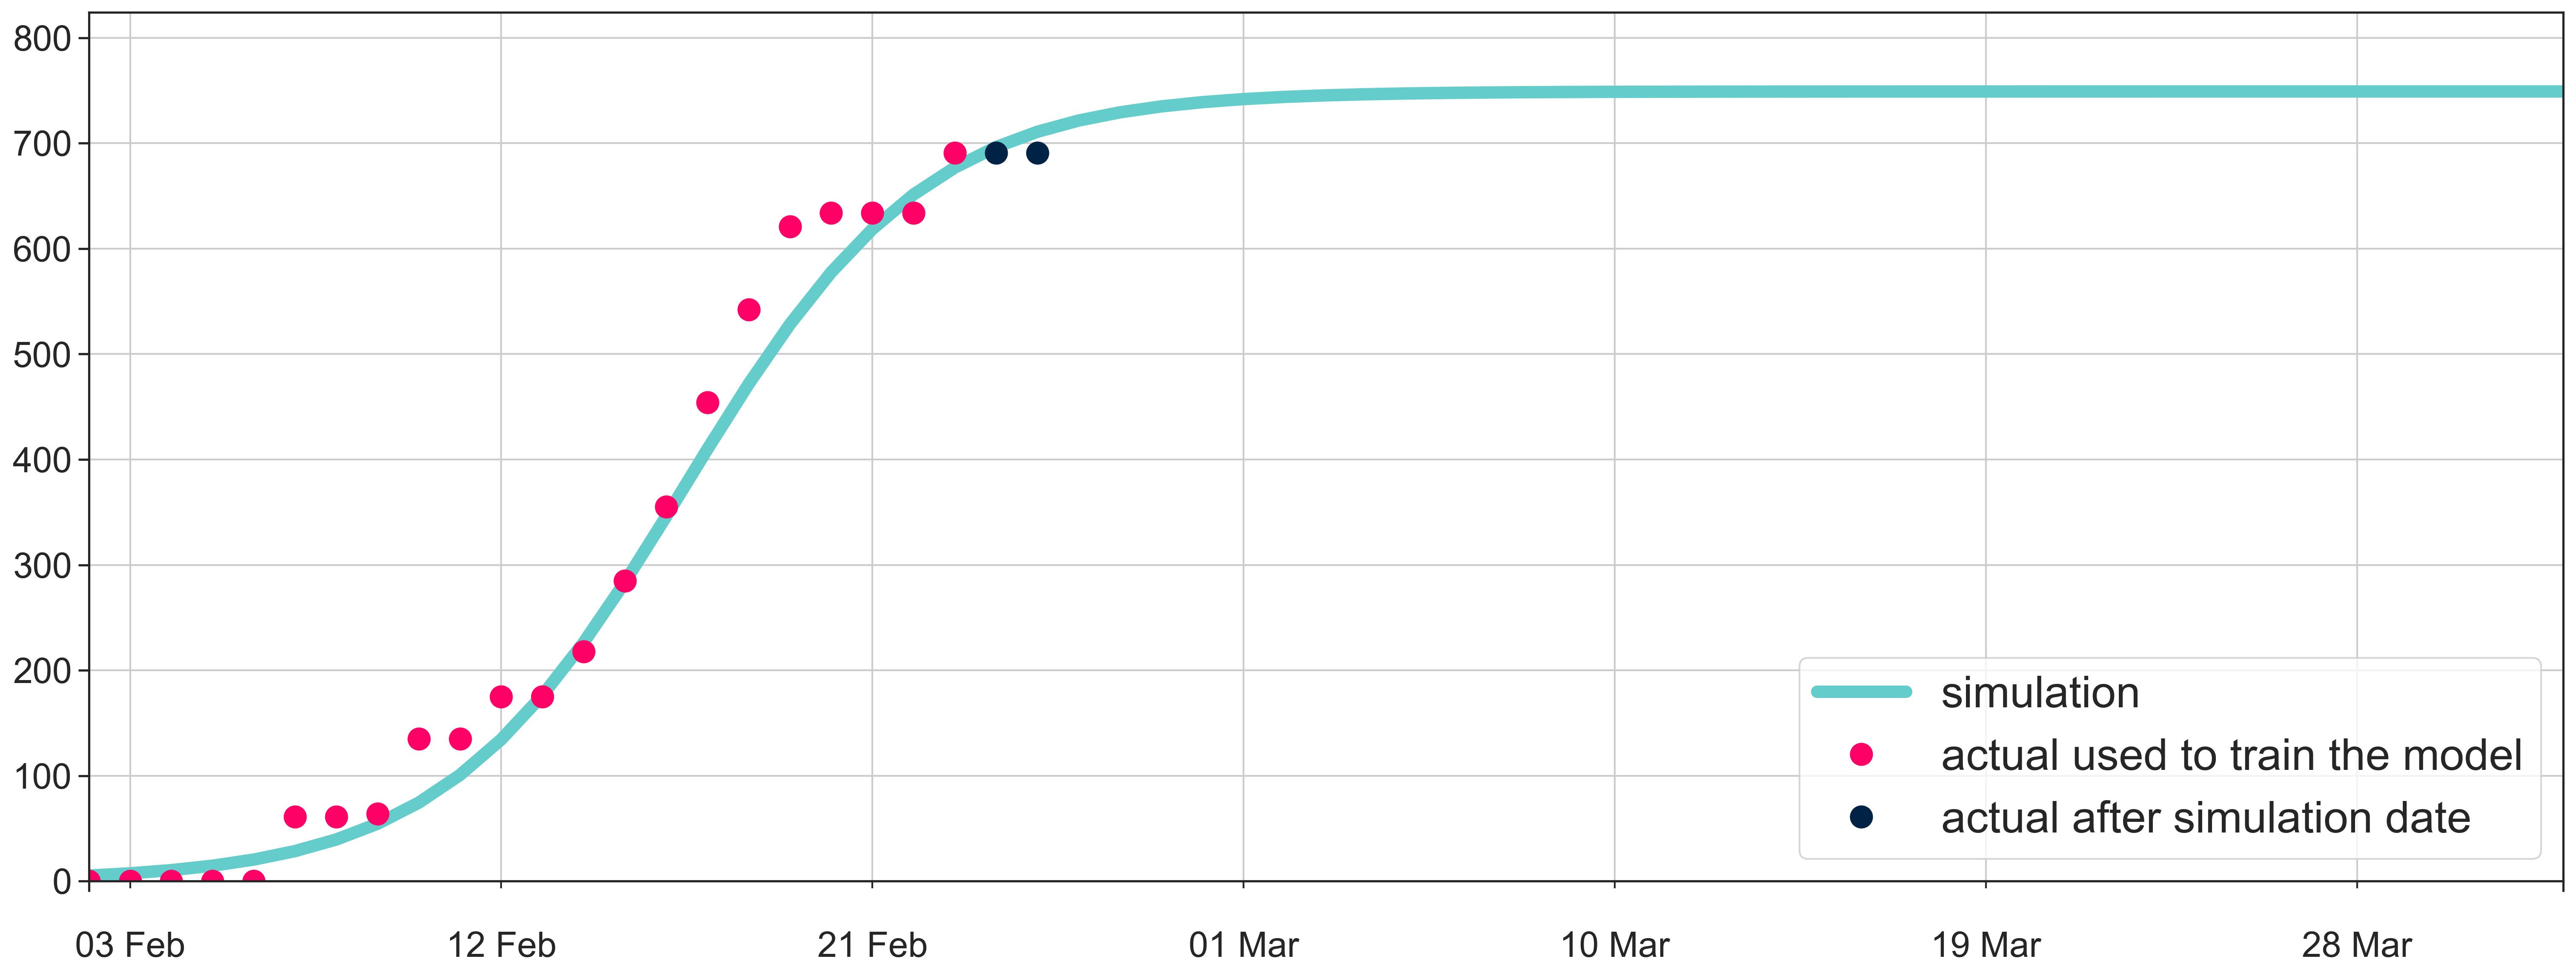

In [238]:
self = sig_cruise_2
fig, ax = plt.subplots()

if normalize:
    normalizer =  max(self.model)
    self.model = self.model / normalizer
    self.actual_cases = self.actual_cases / normalizer
    self.non_trained_cases = self.non_trained_cases / normalizer

self.model.plot(figsize=(25, 10), linewidth=7, color='#65cccc', x_compat=True, ax=ax)

# first the raw data as a scatter plot
self.actual_cases.plot(style='o', ms=12, c='#ff0066', ax=ax)

# non trained plot
self.non_trained_cases.plot(style='o', ms=12, c='#002244ff', ax=ax)



#ax.set_ylabel('confirmed cases\n', fontsize=30)  # Y axis data label
#ax.set_title(self.title, fontsize=20)
ax.legend(['simulation', 'actual used to train the model',
           'actual after simulation date'], prop={'size': 25})

# graphics output section
plt.rcParams["figure.dpi"] = 300
maxi_ax = max(max(self.model.values * 1.1), max(self.non_trained_cases.values)*1.1)
ax.set_ylim((0, maxi_ax))

# Set major ticks with month names
ax.xaxis.set_major_locator(dates.MonthLocator(interval=5))
ax.xaxis.set_major_formatter(dates.DateFormatter(''))
ax.xaxis.set_minor_locator(dates.DayLocator(interval=9))
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n%d %b'))

ax.xaxis.grid(True, which='both')
ax.yaxis.grid(True, which="major")

ax.get_xaxis().set_tick_params(which='minor', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

fig.savefig('Sigmoid_cruise_2.png', dpi=300)

plt.show()

### Test normalized graphs

In [25]:
import datetime as dt

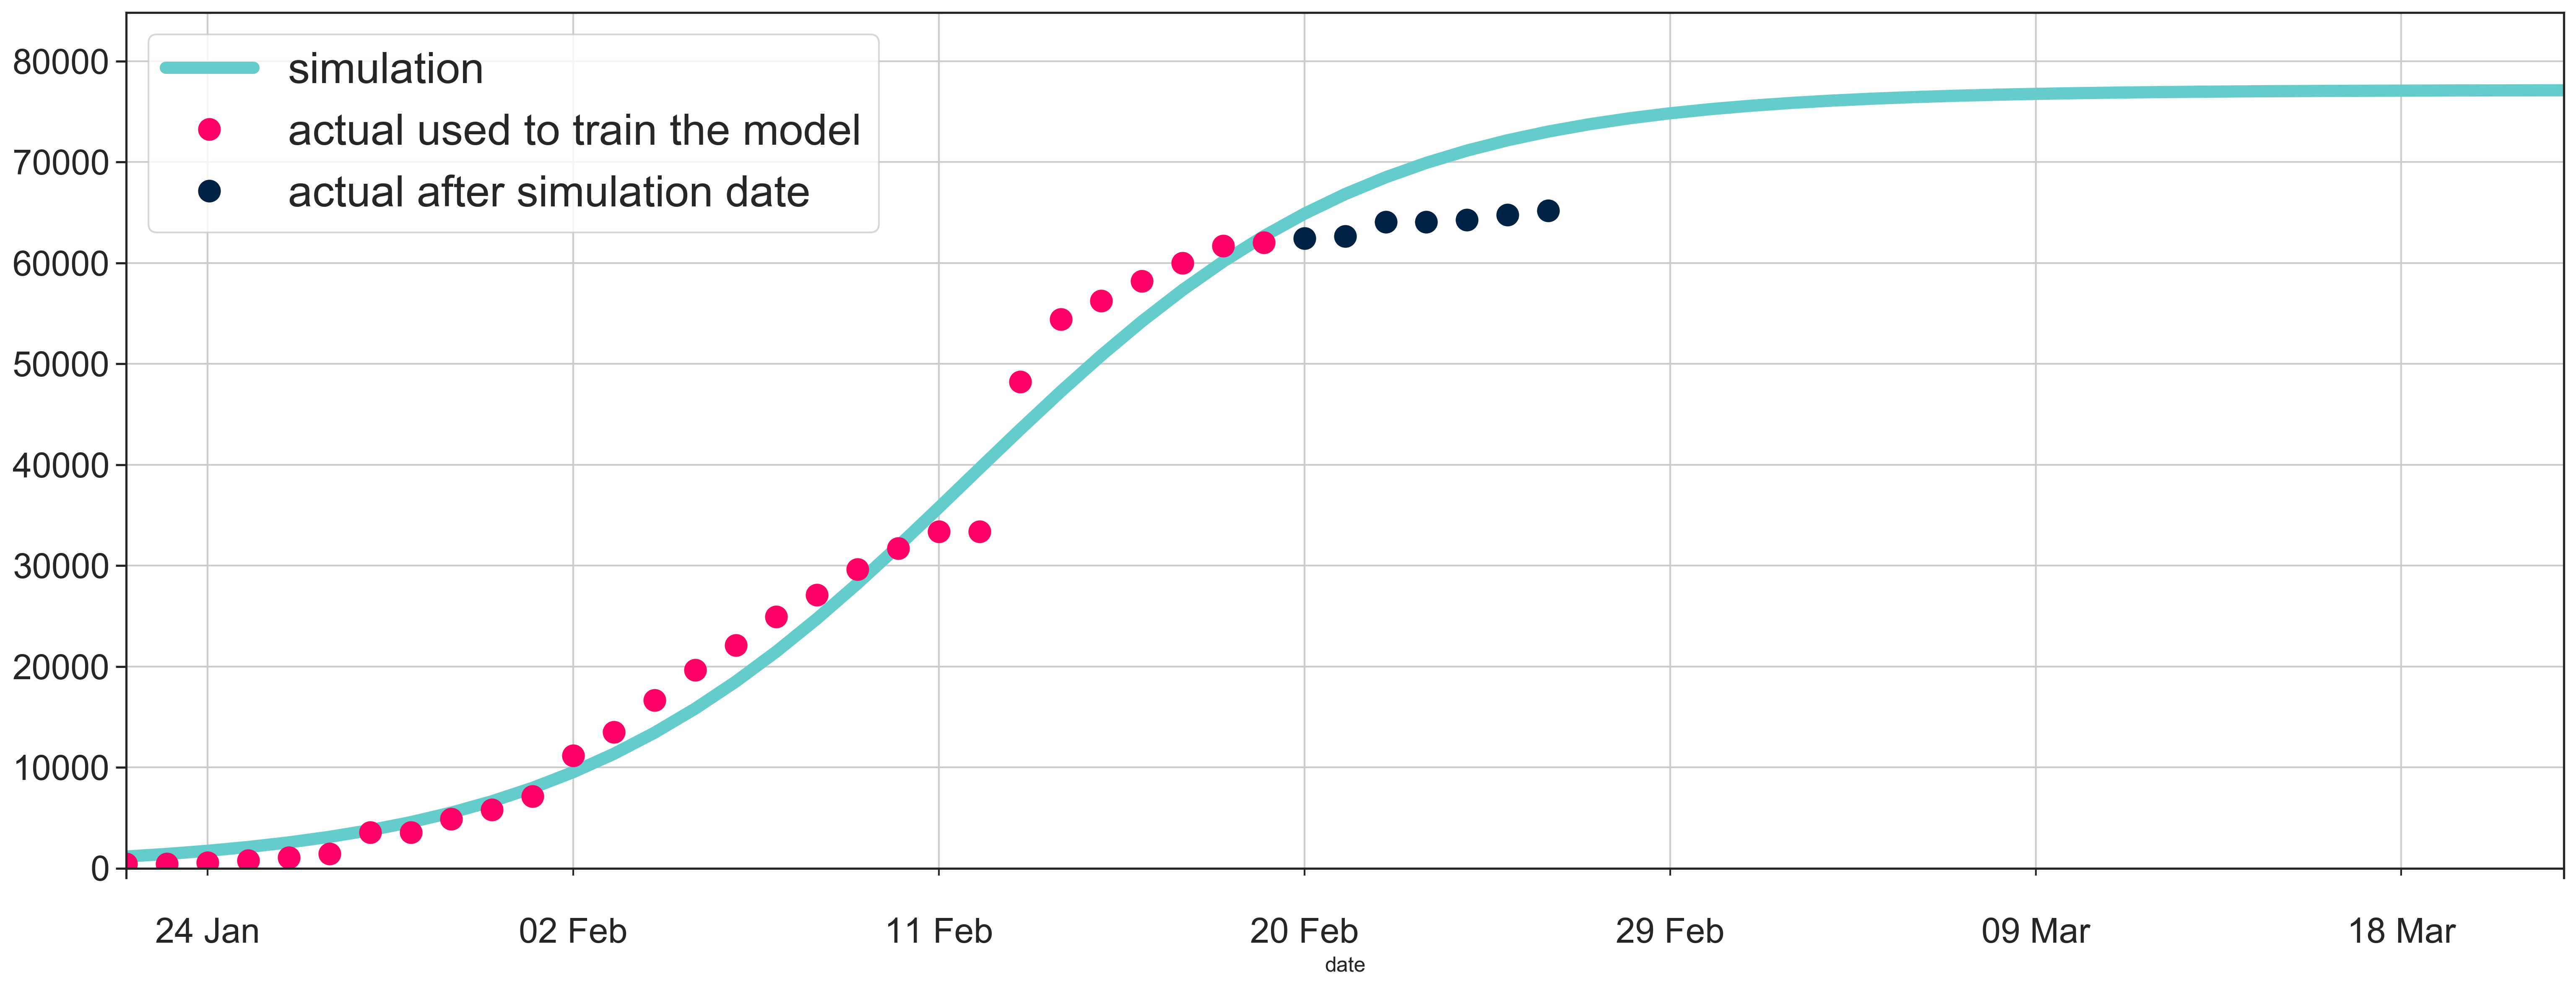

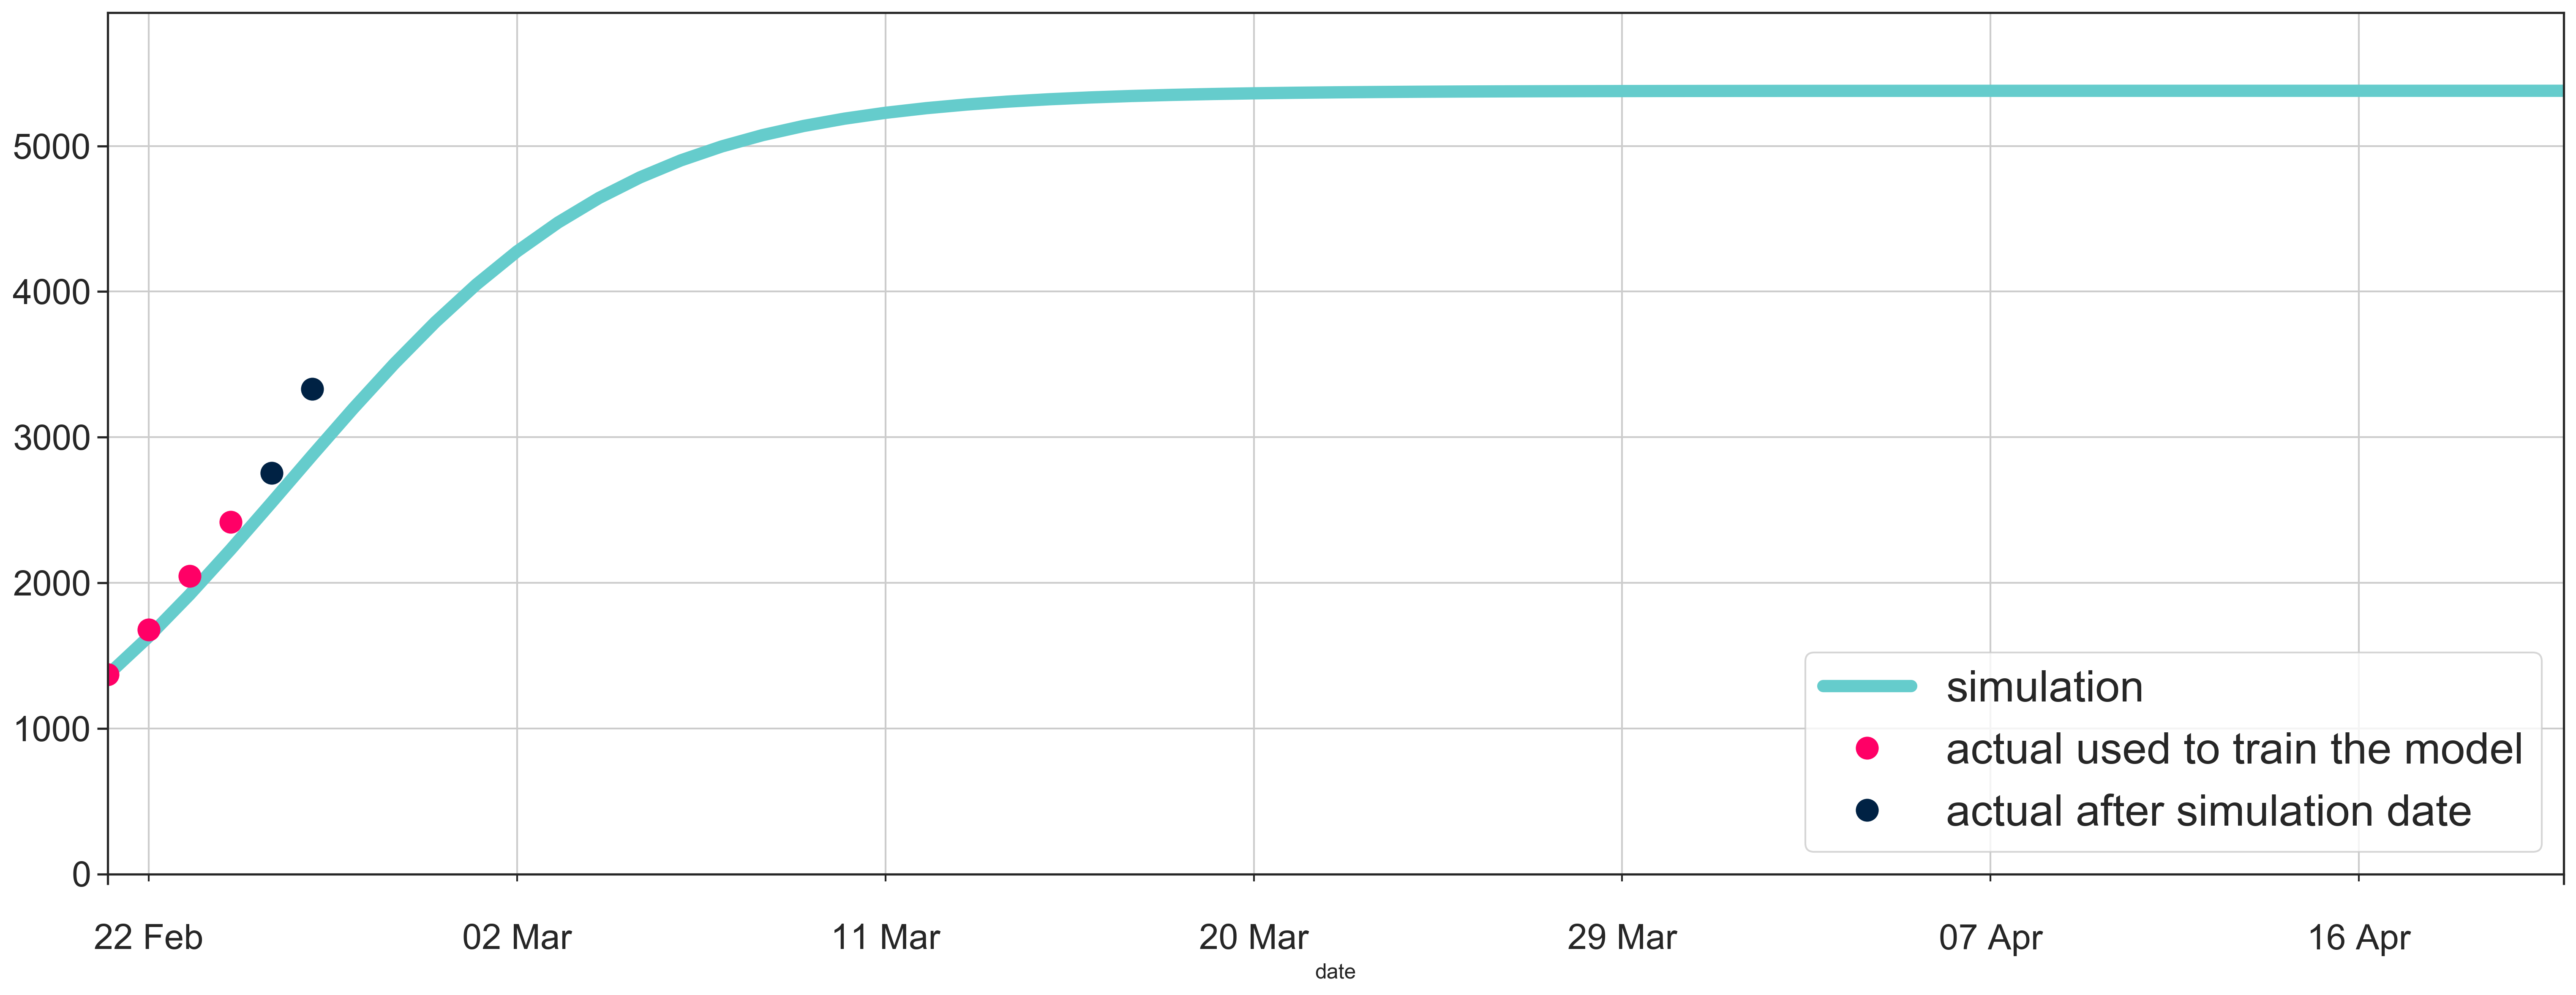

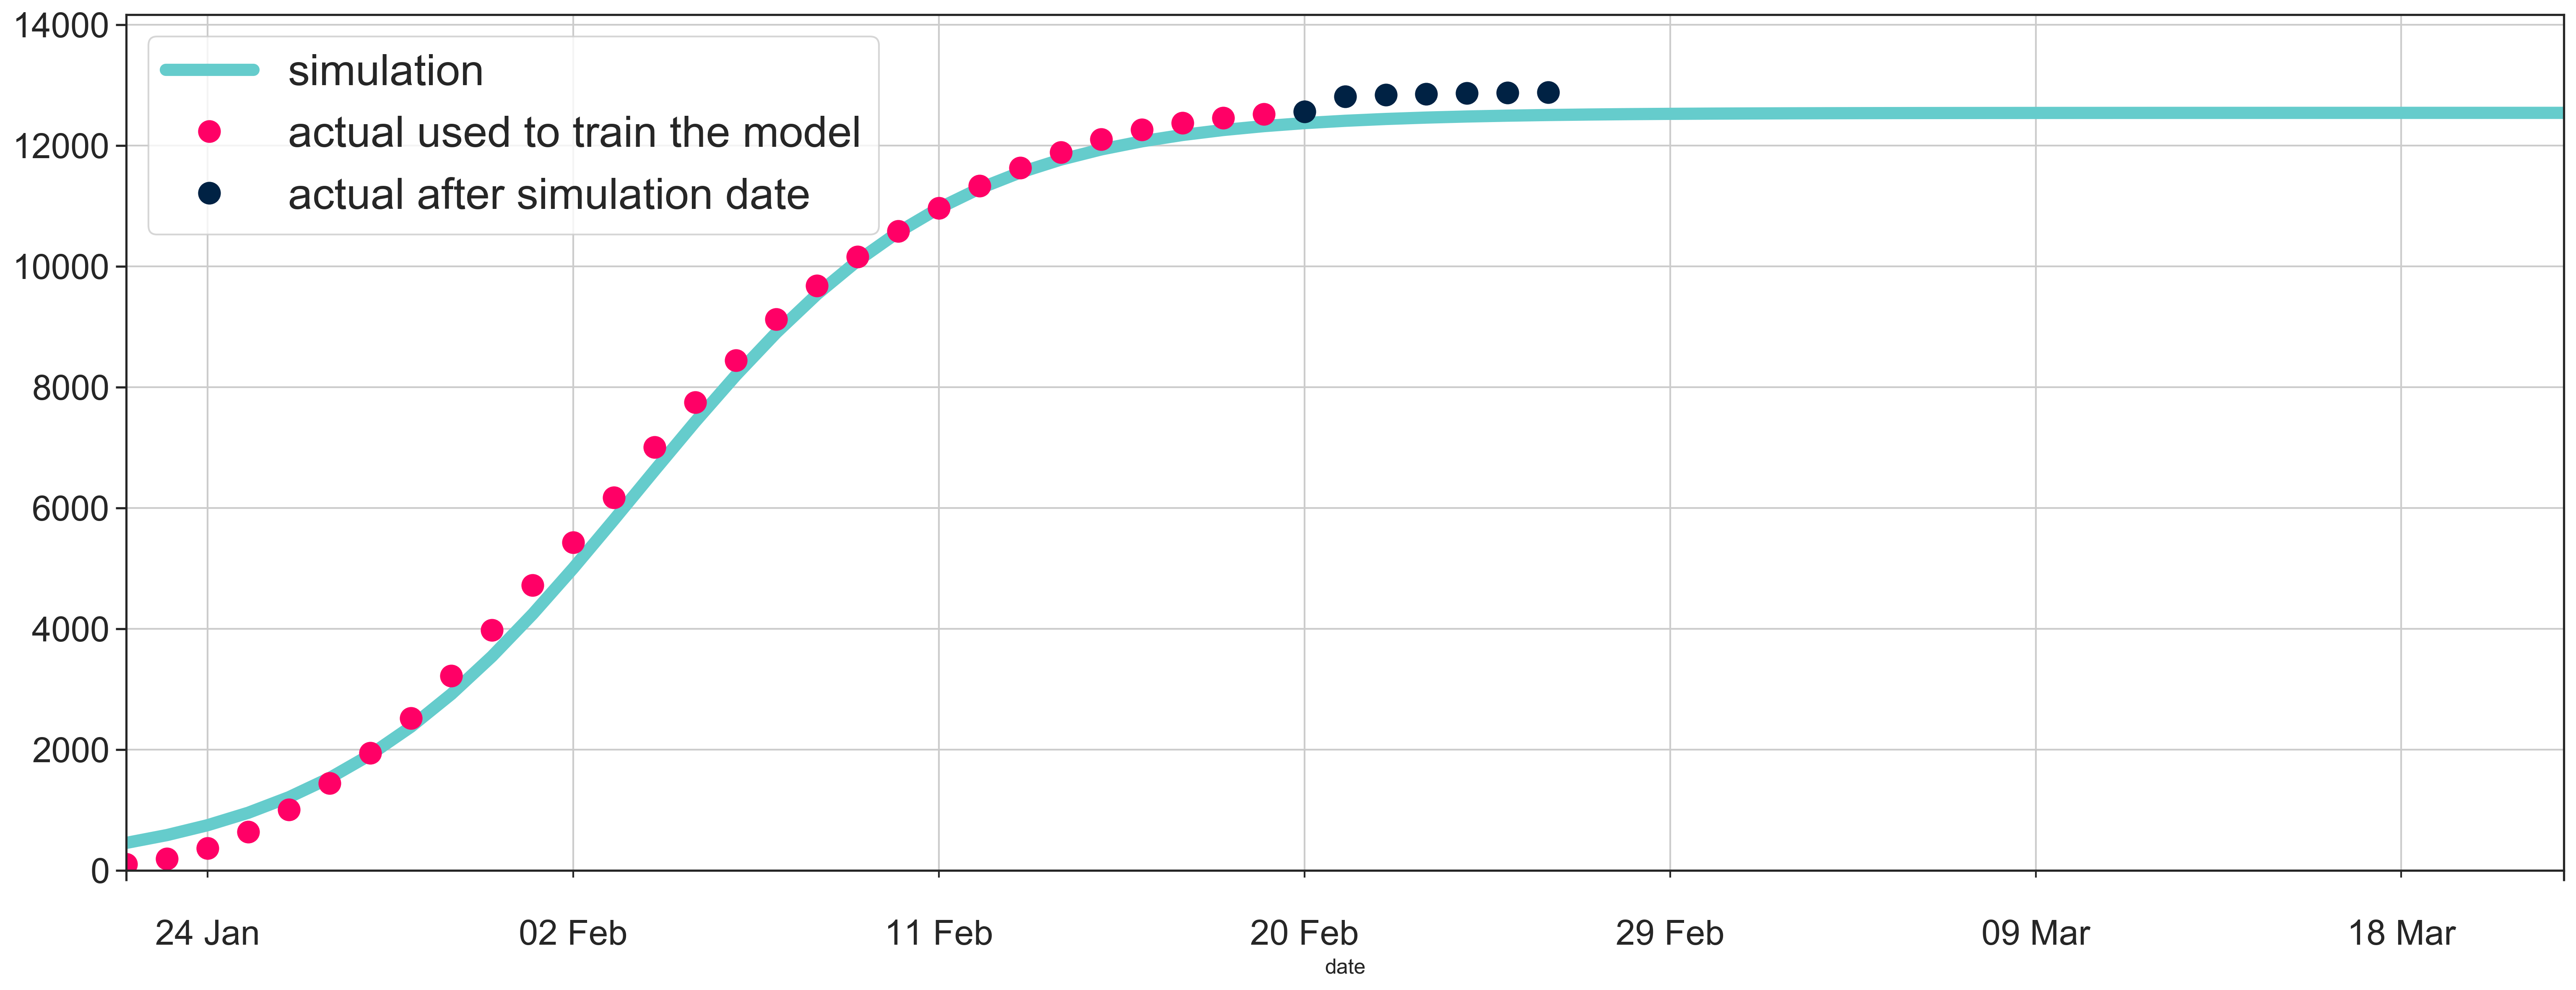

In [23]:
SimoidOptimizers = [sig_hubei, sig_non_china_non_cruise, sig_non_hubei]
titles=['Hubei', 'World_but_China', 'China_but_Hubei']
normalize = False


for i in range(len(SimoidOptimizers)):
    self = SimoidOptimizers[i]
    title = titles[i]
    fig, ax = plt.subplots()
    
    if normalize:
        normalizer =  max(self.model)
        self.model = self.model / normalizer
        self.actual_cases = self.actual_cases / normalizer
        self.non_trained_cases = self.non_trained_cases / normalizer
    
    self.model.plot(figsize=(25, 10), linewidth=7, color='#65cccc', x_compat=True, ax=ax)

    # first the raw data as a scatter plot
    self.actual_cases.plot(style='o', ms=12, c='#ff0066', ax=ax)

    # non trained plot
    self.non_trained_cases.plot(style='o', ms=12, c='#002244ff', ax=ax)



    #ax.set_ylabel('confirmed cases\n', fontsize=30)  # Y axis data label
    #ax.set_title(self.title, fontsize=20)
    ax.legend(['simulation', 'actual used to train the model',
               'actual after simulation date'], prop={'size': 25})

    # graphics output section
    plt.rcParams["figure.dpi"] = 300
    maxi_ax = max(max(self.model.values * 1.1), max(self.non_trained_cases.values)*1.1)
    ax.set_ylim((0, maxi_ax))

    # Set major ticks with month names
    ax.xaxis.set_major_locator(dates.MonthLocator(interval=5))
    ax.xaxis.set_major_formatter(dates.DateFormatter(''))
    ax.xaxis.set_minor_locator(dates.DayLocator(interval=9))
    ax.xaxis.set_minor_formatter(dates.DateFormatter('\n%d %b'))

    ax.xaxis.grid(True, which='both')
    ax.yaxis.grid(True, which="major")

    ax.get_xaxis().set_tick_params(which='minor', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    
    fig.savefig('Figure_Edouard_' + title + '.png', dpi=300)

plt.show()

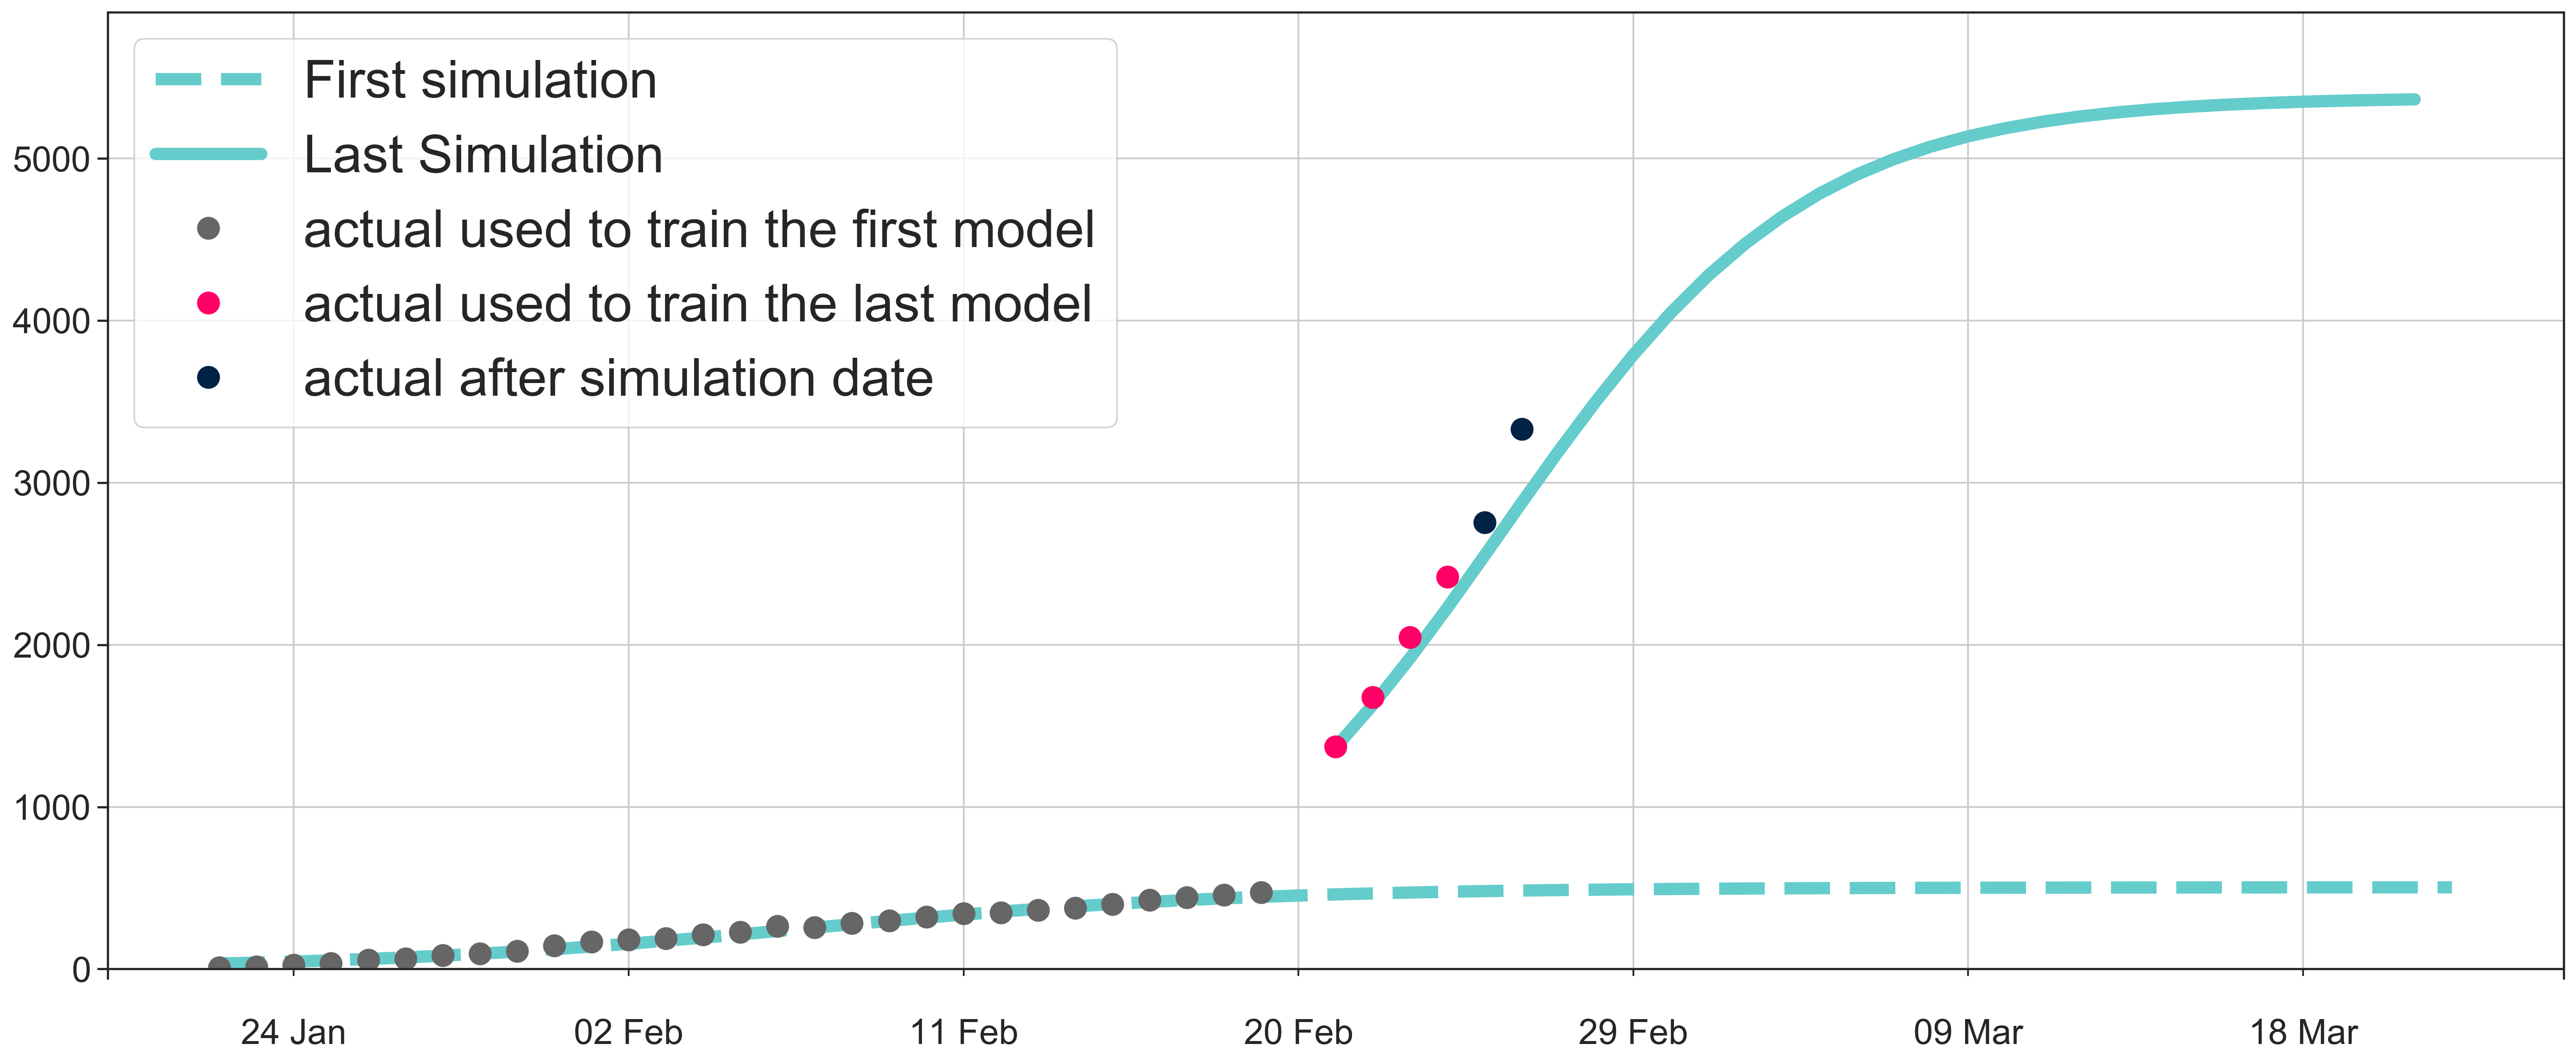

In [24]:
SimoidOptimizers = [sig_world, sig_world_2]
styles = ['--', '-']
labels = ['First simulation', 'Last Simulation']
normalize = False

tab_lines = []
tab_labels = []

fig, ax = plt.subplots(figsize=(25, 10))
for i in range(len(SimoidOptimizers)):
    self = SimoidOptimizers[i]
    
    sig_2 = sig_world
    
    if normalize:
        normalizer =  max(self.model)
        self.model = self.model / normalizer
        self.actual_cases = self.actual_cases / normalizer
        self.non_trained_cases = self.non_trained_cases / normalizer
    
    line, = ax.plot(self.model, styles[i], linewidth=7, color='#65cccc')
    tab_lines.append(line)   
    tab_labels.append(labels[i])
    
    # first the raw data as a scatter plot
    if i == 0:
        point, = ax.plot(self.actual_cases, 'o', ms=12, color='#666666')
    else:
        point_n, = ax.plot(self.actual_cases, 'o', ms=12, color='#ff0066')
    # non trained plot
    if i == 1:
        point_2, = ax.plot(self.non_trained_cases, 'o', ms=12, color='#002244ff')
#     else:
#         self.non_trained_cases.plot(style='o', ms=12, c='#002244ff', ax=ax)
    

tab_lines.append(point)
tab_labels.append('actual used to train the first model')

tab_lines.append(point_n)
tab_labels.append('actual used to train the last model')

tab_lines.append(point_2)
tab_labels.append('actual after simulation date')

#ax.set_ylabel('confirmed cases\n', fontsize=30)  # Y axis data label
#ax.set_title(self.title, fontsize=20)
ax.legend(tab_lines, tab_labels, prop={'size': 30})

# graphics output section
plt.rcParams["figure.dpi"] = 300
maxi_ax = max(max(self.model.values * 1.1), max(self.non_trained_cases.values)*1.1)
ax.set_ylim((0, maxi_ax))

# Set major ticks with month names
ax.xaxis.set_major_locator(dates.MonthLocator(interval=5))
ax.xaxis.set_major_formatter(dates.DateFormatter(''))
ax.xaxis.set_minor_locator(dates.DayLocator(interval=9))
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n%d %b'))

ax.xaxis.grid(True, which='both')
ax.yaxis.grid(True, which="major")

ax.get_xaxis().set_tick_params(which='minor', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

fig.savefig('Figure_Edouard_new_old_sim.png', dpi=300)

In [356]:
tab_labels

['First simulation',
 'Last Simulation',
 'actual used to train the model',
 'actual after simulation date']

In [317]:
self.actual_cases

2020-02-21    1371
2020-02-22    1677
2020-02-23    2047
2020-02-24    2418
Freq: D, dtype: int64

In [345]:
df_2 = pd.DataFrame(self.actual_cases, columns=['Cases'])

In [346]:
df_1 = pd.DataFrame(sig_2.actual_cases, columns=['Cases'])

In [349]:
df_2

Cases
2020-02-21   1371
2020-02-22   1677
2020-02-23   2047
2020-02-24   2418

In [347]:
pd.merge(df_1, df_2)

Empty DataFrame
Columns: [Cases]
Index: []

In [329]:
pd.merge(pd.DataFrame(sig.actual_cases, columns=['Cases']), pd.DataFrame(self.actual_cases, columns=['Cases']), how='left')

Cases
0       0
1       0
2       0
3       0
4       0
5      61
6      61
7      64
8     135
9     135
10    175
11    175
12    218
13    285
14    355
15    454
16    542
17    621
18    634
19    634
20    634
21    691

In [316]:
sig.actual_cases[:-5]

2020-02-02      0
2020-02-03      0
2020-02-04      0
2020-02-05      0
2020-02-06      0
2020-02-07     61
2020-02-08     61
2020-02-09     64
2020-02-10    135
2020-02-11    135
2020-02-12    175
2020-02-13    175
2020-02-14    218
2020-02-15    285
2020-02-16    355
2020-02-17    454
2020-02-18    542
Freq: D, dtype: int64

In [103]:
fig.savefig('Figure_Edouard.png', dpi=300)

## Population region china

In [56]:
pop = pd.read_csv('population_china.csv', sep='	', thousands=',')

In [57]:
pop

Region      2018      2017      2016      2015      2014  \
0          Beijing  30319.98  28014.94  25669.13  23014.59  21330.83   
1          Tianjin  18809.64  18549.19  17885.39  16538.19  15726.93   
2            Hebei  36010.27  34016.32  32070.45  29806.11  29421.15   
3           Shanxi  16818.11  15528.42  13050.41  12766.49  12761.49   
4   Inner Mongolia  17289.22  16096.21  18128.10  17831.51  17770.19   
5         Liaoning  25315.35  23409.24  22246.90  28669.02  28626.58   
6            Jilin  15074.62  14944.53  14776.80  14063.13  13803.14   
7     Heilongjiang  16361.62  15902.68  15386.09  15083.67  15039.38   
8         Shanghai  32679.87  30632.99  28178.65  25123.45  23567.70   
9          Jiangsu  92595.40  85869.76  77388.28  70116.38  65088.32   
10        Zhejiang  56197.15  51768.26  47251.36  42886.49  40173.03   
11           Anhui  30006.82  27018.00  24407.62  22005.63  20848.75   
12          Fujian  35804.04  32182.09  28810.58  25979.82  24055.76   
13         Jiangxi  21984.78  20006.31  18499.00  16723.78  15714.63   
14        Shandong  76469.67  72634.15  68024.49  63002.33  59426.59   
15           Henan  48055.86  44552.83  40471.79  37002.16  34938.24   
16           Hubei  39366.55  35478.09  32665.38  29550.19  27379.22   
17           Hunan  36425.78  33902.96  31551.37  28902.21  27037.32   
18       Guangdong  97277.77  89705.23  80854.91  72812.55  67809.85   
19         Guangxi  20352.51  18523.26  18317.64  16803.12  15672.89   
20          Hainan   4832.05   4462.54   4053.20   3702.76   3500.72   
21       Chongqing  20363.19  19424.73  17740.59  15717.27  14262.60   
22         Sichuan  40678.13  36980.22  32934.54  30053.10  28536.66   
23         Guizhou  14806.45  13540.83  11776.73  10502.56   9266.39   
24          Yunnan  17881.12  16376.34  14788.42  13619.17  12814.59   
25           Tibet   1477.63   1310.92   1151.41   1026.39    920.83   
26         Shaanxi  24438.32  21898.81  19399.59  18021.86  17689.94   
27           Gansu   8246.07   7459.90   7200.37   6790.32   6836.82   
28         Qinghai   2865.23   2624.83   2572.49   2417.05   2303.32   
29         Ningxia   3705.18   3443.56   3168.59   2911.77   2752.10   
30        Xinjiang  12199.08  10881.96   9649.70   9324.80   9273.46   

        2013      2012      2011      2010      2009  
0   19800.81  17879.40  16251.93  14113.58  12153.03  
1   14442.01  12893.88  11307.28   9224.46   7521.85  
2   28442.95  26575.01  24515.76  20394.26  17235.48  
3   12665.25  12112.83  11237.55   9200.86   7358.31  
4   16916.50  15880.58  14359.88  11672.00   9740.25  
5   27213.22  24846.43  22226.70  18457.27  15212.49  
6   13046.40  11939.24  10568.83   8667.58   7278.75  
7   14454.91  13691.58  12582.00  10368.60   8587.00  
8   21818.15  20181.72  19195.69  17165.98  15046.45  
9   59753.37  54058.22  49110.27  41425.48  34457.30  
10  37756.59  34665.33  32318.85  27722.31  22990.35  
11  19229.34  17212.05  15300.65  12359.33  10062.82  
12  21868.49  19701.78  17560.18  14737.12  12236.53  
13  14410.19  12948.88  11702.82   9451.26   7655.18  
14  55230.32  50013.24  45361.85  39169.92  33896.65  
15  32191.30  29599.31  26931.03  23092.36  19480.46  
16  24791.83  22250.45  19632.26  15967.61  12961.10  
17  24621.67  22154.23  19669.56  16037.96  13059.69  
18  62474.79  57067.92  53210.28  46013.06  39482.56  
19  14449.90  13035.10  11720.87   9569.85   7759.16  
20   3177.56   2855.54   2522.66   2064.50   1654.21  
21  12783.26  11409.60  10011.37   7925.58   6530.01  
22  26392.07  23872.80  21026.68  17185.48  14151.28  
23   8086.86   6852.20   5701.84   4602.16   3912.68  
24  11832.31  10309.47   8893.12   7224.18   6169.75  
25    815.67    701.03    605.83    507.46    441.36  
26  16205.45  14453.68  12512.30  10123.48   8169.80  
27   6330.69   5650.20   5020.37   4120.75   3387.56  
28   2122.06   1893.54   1670.44   1350.43   1081.27  
29   2577.57   2341.29   2102.21   1689.65   1353.31  
30

In [58]:
pop = pop[['Region', '2018']]
pop.columns = ['Region', 'population']

In [61]:
china = data_t.columns[data_t.columns.str.startswith('Mainland_China')]
list_of_region = china.str.split('_', expand=True).to_list()
regions = [i[2] for i in list_of_region]
china_data = data_t[china]
regions[14] = 'Inner Mongolia'
china_data.columns = regions
for region in regions:
    china_data[region] = china_data[region]/ pop[pop['Region'] == region]['population'].values[0]

china_data = china_data.astype(float)

In [83]:
df = china_data

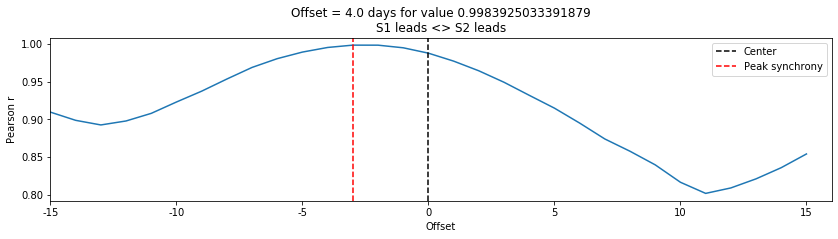

In [94]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = df['Jiangxi']
d2 = df['Heilongjiang']
day_range = 15
rs = [crosscorr(d1,d2, lag) for lag in range(-int(day_range),int(day_range+1))]
offset = np.ceil(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.floor(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} days for value {np.max(rs)}\nS1 leads <> S2 leads',
       #ylim=[.1,.31],
       xlim=[0,31], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 5, 10, 15, 20, 25, 30])
ax.set_xticklabels([-15, -10, -5, 0, 5, 10, 15]);
plt.legend()

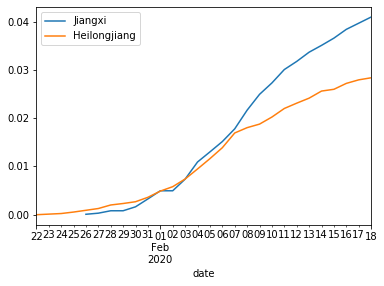

In [129]:
d1.shift(4).plot(legend=d1.name)
d2.plot(legend=d2.name)

# Prediction of future cases

In [6]:
import keras

Using TensorFlow backend.


In [7]:
import datetime as dt
import numpy as np

In [8]:
column_china = []
for column in data_all.columns:
    if column[:14] == 'Mainland_China':
        column_china.append(column)
columns = column_china + ['South_Korea_nan', 'Italy_nan', 'Hong_Kong_Hong_Kong']

In [9]:
df_train_diff = data_all.copy()
for i in range(1, len(data_all)):
    df_train_diff.loc[data_all.index.min() + dt.timedelta(days=len(data_all) - i)] = df_train_diff.loc[data_all.index.min() + dt.timedelta(days=len(data_all) - i)] - \
                df_train_diff.loc[data_all.index.min() + dt.timedelta(days=len(data_all) - i - 1)]
    

In [10]:
df_train_raw = df_train_diff[columns]

In [11]:
df = pd.DataFrame(df_train_raw.stack().reset_index().rename(columns={'level_0': 'date', 
                                                                     'level_1':'Zone',
                                                                     0: 'New Cases'}))

In [12]:
df_merge = pd.merge(df, df, on='Zone')
df_merge = df_merge[(df_merge['date_x'] > df_merge['date_y']) & (df_merge['date_x'] <= 
                                                                 df_merge['date_y'] + dt.timedelta(days=14))].copy()

In [13]:
def influent_dates(x):
    tab = []
    for i in x:
        tab.append([i])
    return tab

In [14]:
df_test = pd.DataFrame()
grouper = df_merge.groupby(['date_x', 'Zone'])
df_test[['New Cases', 'Count']] = grouper.agg(['max', 'count'])['New Cases_x']

In [15]:
df_test['Last Cases'] = grouper['New Cases_y'].apply(influent_dates)

In [16]:
df_test = df_test[df_test['Count'] == 14]
df_test = df_test.drop(columns=['Count'])

In [17]:
df_test.index = df_test.index.rename(['date', 'Zone'])

In [18]:
df_test = df_test.reset_index()

In [21]:
X_train = np.asarray(df_test[df_test['date'] <= pd.Timestamp('2020-02-22')]['Last Cases'].values.tolist())
y_train = np.asarray(df_test[df_test['date'] <= pd.Timestamp('2020-02-22')]['New Cases'].values.tolist())

In [22]:
inputs = keras.Input(shape=(14, 1, ))
lstm = keras.layers.LSTM(10)
dense = keras.layers.Dense(1)

output = dense(lstm(inputs))

In [3]:
a = [1, 2, 3]
a[:-1]

[1, 2]

In [23]:
model = keras.models.Sequential()

model.add(lstm)
model.add(dense)

In [22]:
model = keras.Model(inputs=inputs, output=output)

/Users/maxenceleclercq/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [24]:
model.compile(loss='mse',
              optimizer=keras.optimizers.RMSprop(0.001),
              metrics=['mae', 'mse'])

In [25]:
X_train.shape

(8, 14, 1)

In [1]:
hist = model.fit(X_train, y_train, epochs=1)

NameError: name 'model' is not defined

In [198]:
X_test = []
y_test = []

for row in inputs_data:
    X_test.append(row[1:-1])
    y_test.append(row[-1][0])

In [201]:
model.predict(np.asarray(X_test))

array([[0.11995005],
       [0.13400225],
       [0.03303053],
       [0.13662393],
       [0.14085928],
       [0.01374605],
       [0.14931901],
       [0.1400104 ],
       [0.14065622],
       [0.03996326],
       [0.06472234],
       [0.06734823],
       [0.13658546],
       [0.01756759],
       [0.14163865],
       [0.12828028],
       [0.13591613],
       [0.14220217],
       [0.14055906],
       [0.14086351],
       [0.14056116],
       [0.13740973],
       [0.00674814],
       [0.1431795 ],
       [0.1425615 ],
       [0.09915362],
       [0.15352418],
       [0.14055596],
       [0.14011833],
       [0.14106558],
       [0.1284202 ],
       [0.        ],
       [0.        ],
       [0.00364272]], dtype=float32)

In [182]:
hist.history()

TypeError: 'dict' object is not callable

In [144]:
np.random.random([32, 10, 8]).astype(np.float32)

array([[[0.46556067, 0.48477438, 0.8107113 , ..., 0.55684507,
         0.5160171 , 0.9940654 ],
        [0.24836956, 0.6583249 , 0.45771   , ..., 0.7406709 ,
         0.4974089 , 0.52479506],
        [0.39935574, 0.1441018 , 0.1845491 , ..., 0.40918818,
         0.54871255, 0.21699068],
        ...,
        [0.75070834, 0.9863953 , 0.8802528 , ..., 0.13979107,
         0.7371233 , 0.18444781],
        [0.4179205 , 0.5615093 , 0.585258  , ..., 0.32243645,
         0.33588123, 0.29248756],
        [0.40935186, 0.9011196 , 0.8921675 , ..., 0.5987257 ,
         0.27831548, 0.46499464]],

       [[0.7826566 , 0.62456226, 0.45757565, ..., 0.7114804 ,
         0.02966144, 0.4438241 ],
        [0.48274118, 0.5746265 , 0.50830483, ..., 0.06992634,
         0.3178605 , 0.52199036],
        [0.22748385, 0.48618606, 0.13752273, ..., 0.24602011,
         0.66256326, 0.18034123],
        ...,
        [0.18229404, 0.9808321 , 0.7425402 , ..., 0.18909456,
         0.5790767 , 0.48455405],
        [0.2

In [404]:
## Others

# Manual fit of sigmoid

In [170]:
def sigmoid(X, lambda_t):
    return 1/(1+np.exp(-lambda_t*X))

## Non hubei

In [171]:
non_hubei = ['Mainland_China_Anhui', 'Mainland_China_Beijing',
       'Mainland_China_Chongqing', 'Mainland_China_Fujian',
       'Mainland_China_Gansu', 'Mainland_China_Guangdong',
       'Mainland_China_Guangxi', 'Mainland_China_Guizhou',
       'Mainland_China_Hainan', 'Mainland_China_Hebei',
       'Mainland_China_Heilongjiang', 'Mainland_China_Henan',
        'Mainland_China_Hunan',
       'Mainland_China_Inner_Mongolia', 'Mainland_China_Jiangsu',
       'Mainland_China_Jiangxi', 'Mainland_China_Jilin',
       'Mainland_China_Liaoning', 'Mainland_China_Ningxia',
       'Mainland_China_Qinghai', 'Mainland_China_Shaanxi',
       'Mainland_China_Shandong', 'Mainland_China_Shanghai',
       'Mainland_China_Shanxi', 'Mainland_China_Sichuan',
       'Mainland_China_Tianjin', 'Mainland_China_Tibet',
       'Mainland_China_Xinjiang', 'Mainland_China_Yunnan',
       'Mainland_China_Zhejiang', ]

In [172]:
X_non_hub = full_df[full_df['variable'].isin(non_hubei)]
X_non_hub= X_non_hub.set_index('date')

X_non_hub = X_non_hub.resample('D').sum()['value']

In [173]:
max_cases = 13000
day_range = 50

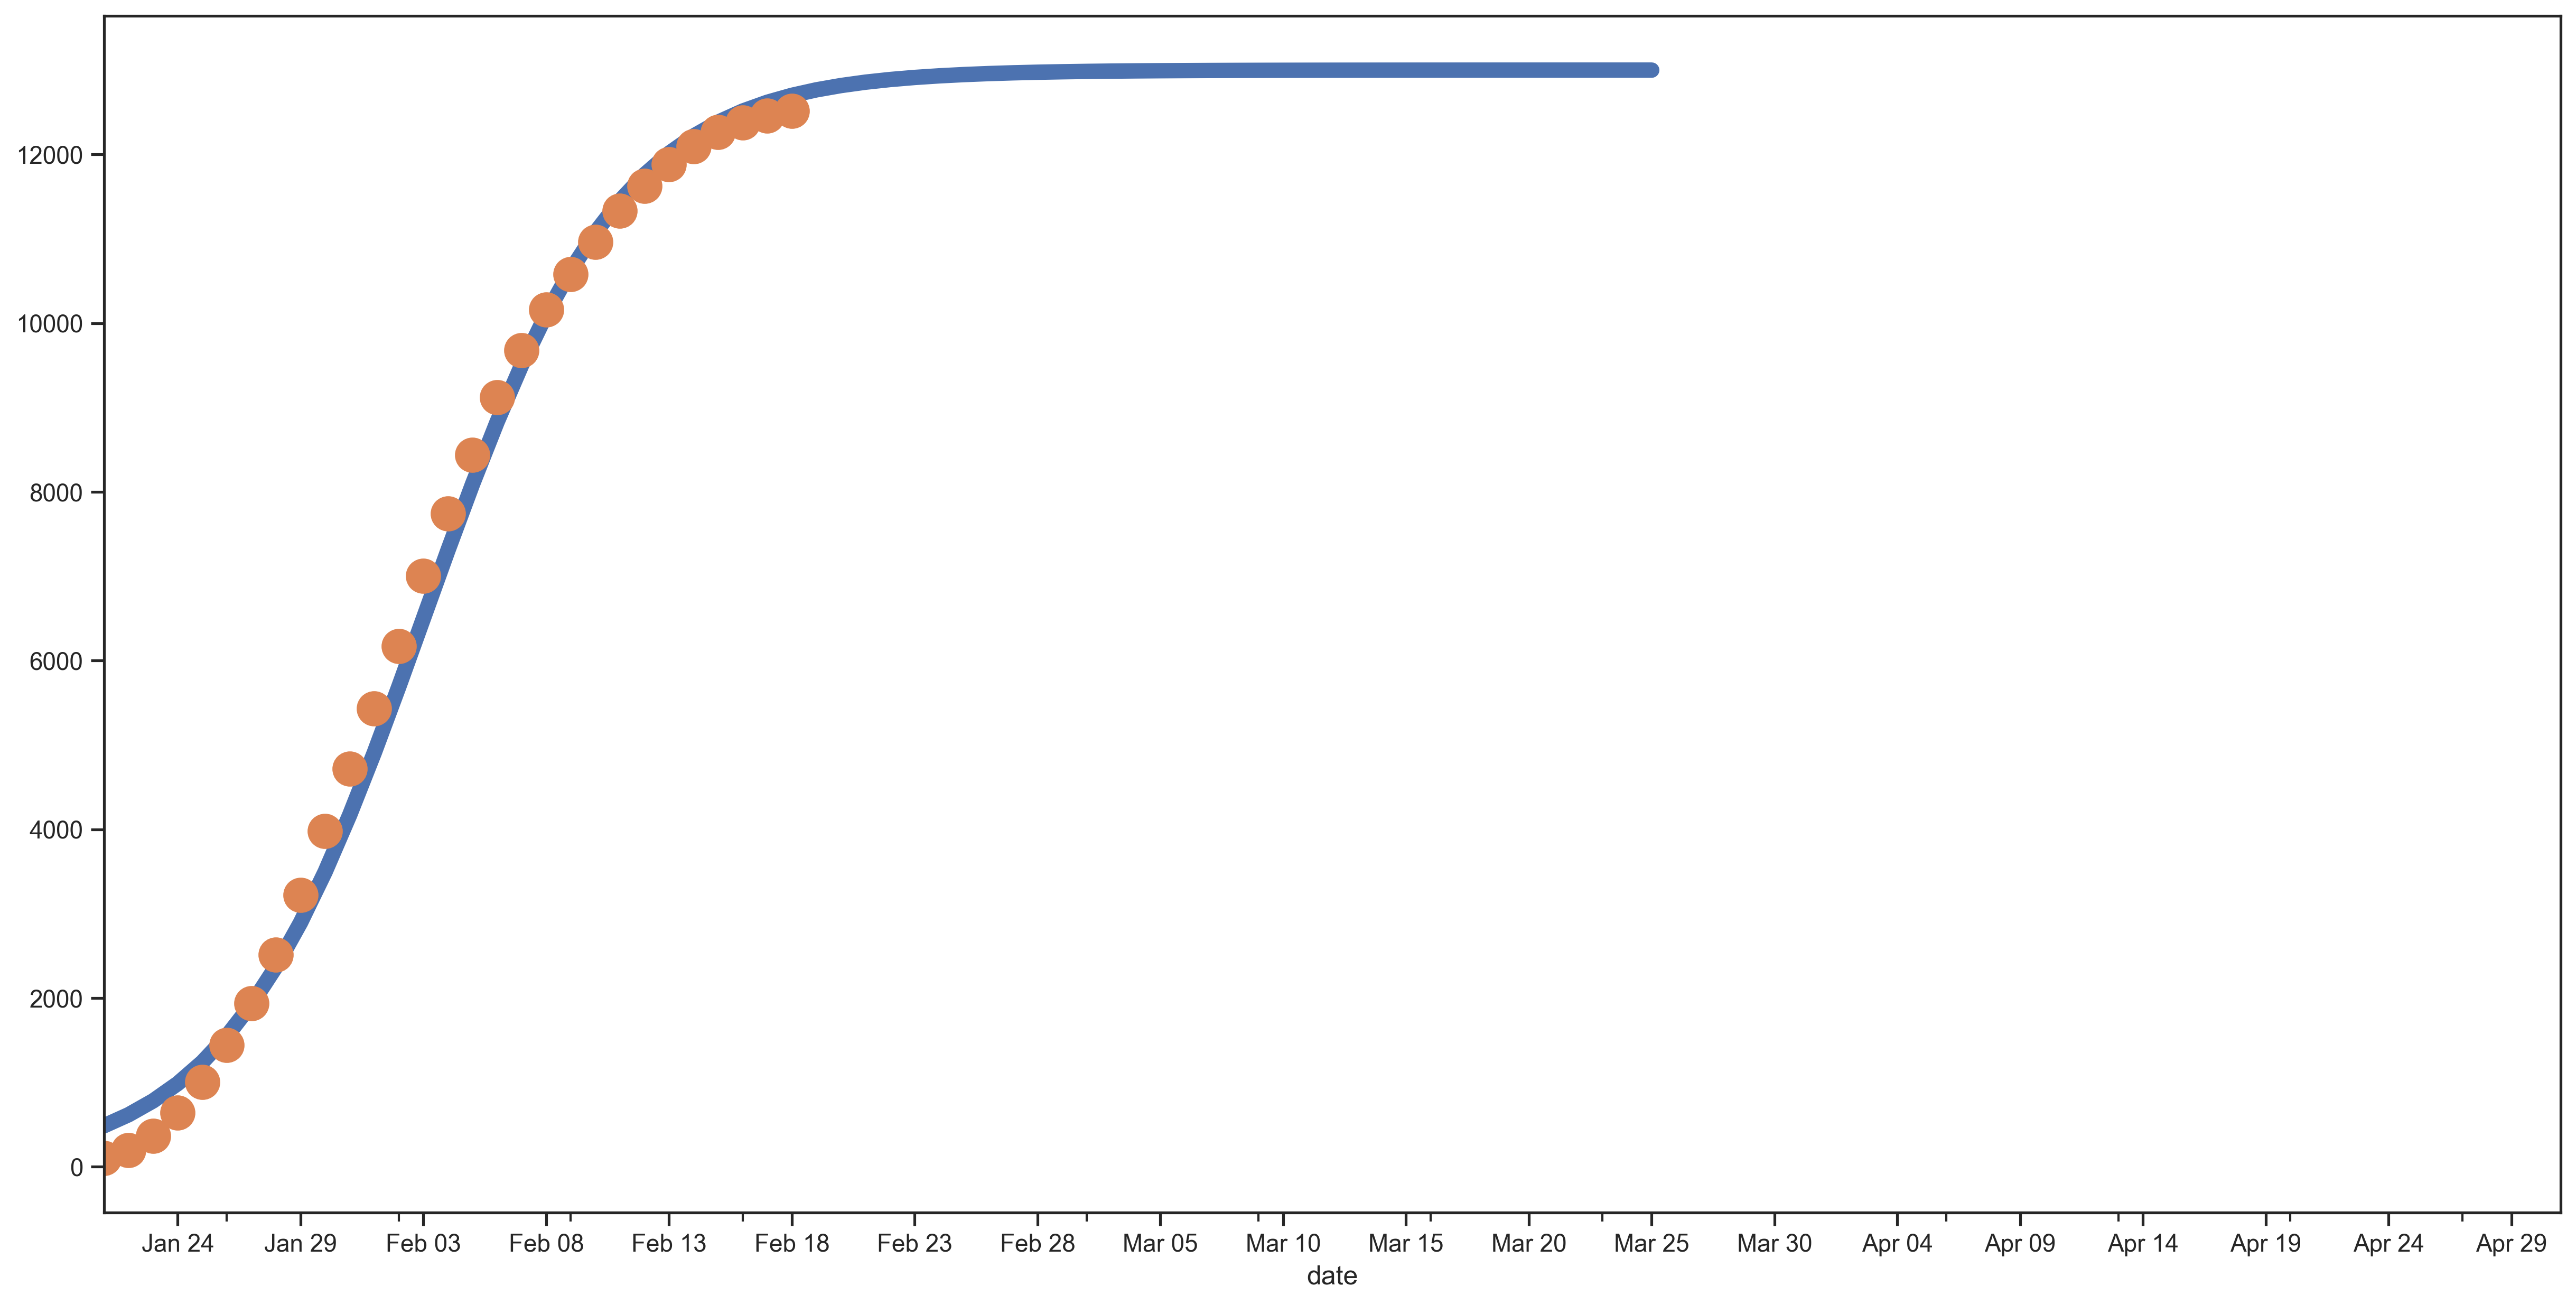

In [174]:
import matplotlib.dates as mdates
x = np.linspace(-day_range, day_range, day_range*2+1)
index_sig = pd.date_range('2020-01-22', periods= day_range*2+1)
X_sigmoid = pd.Series(sigmoid(x, 0.25) * max_cases)
X_sigmoid.index = index_sig
ax = X_sigmoid.shift(-37).plot(figsize=(20,10), linewidth=7)
X_non_hub.plot(style='o', ms=15)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))

#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

#plt.gcf().autofmt_xdate()

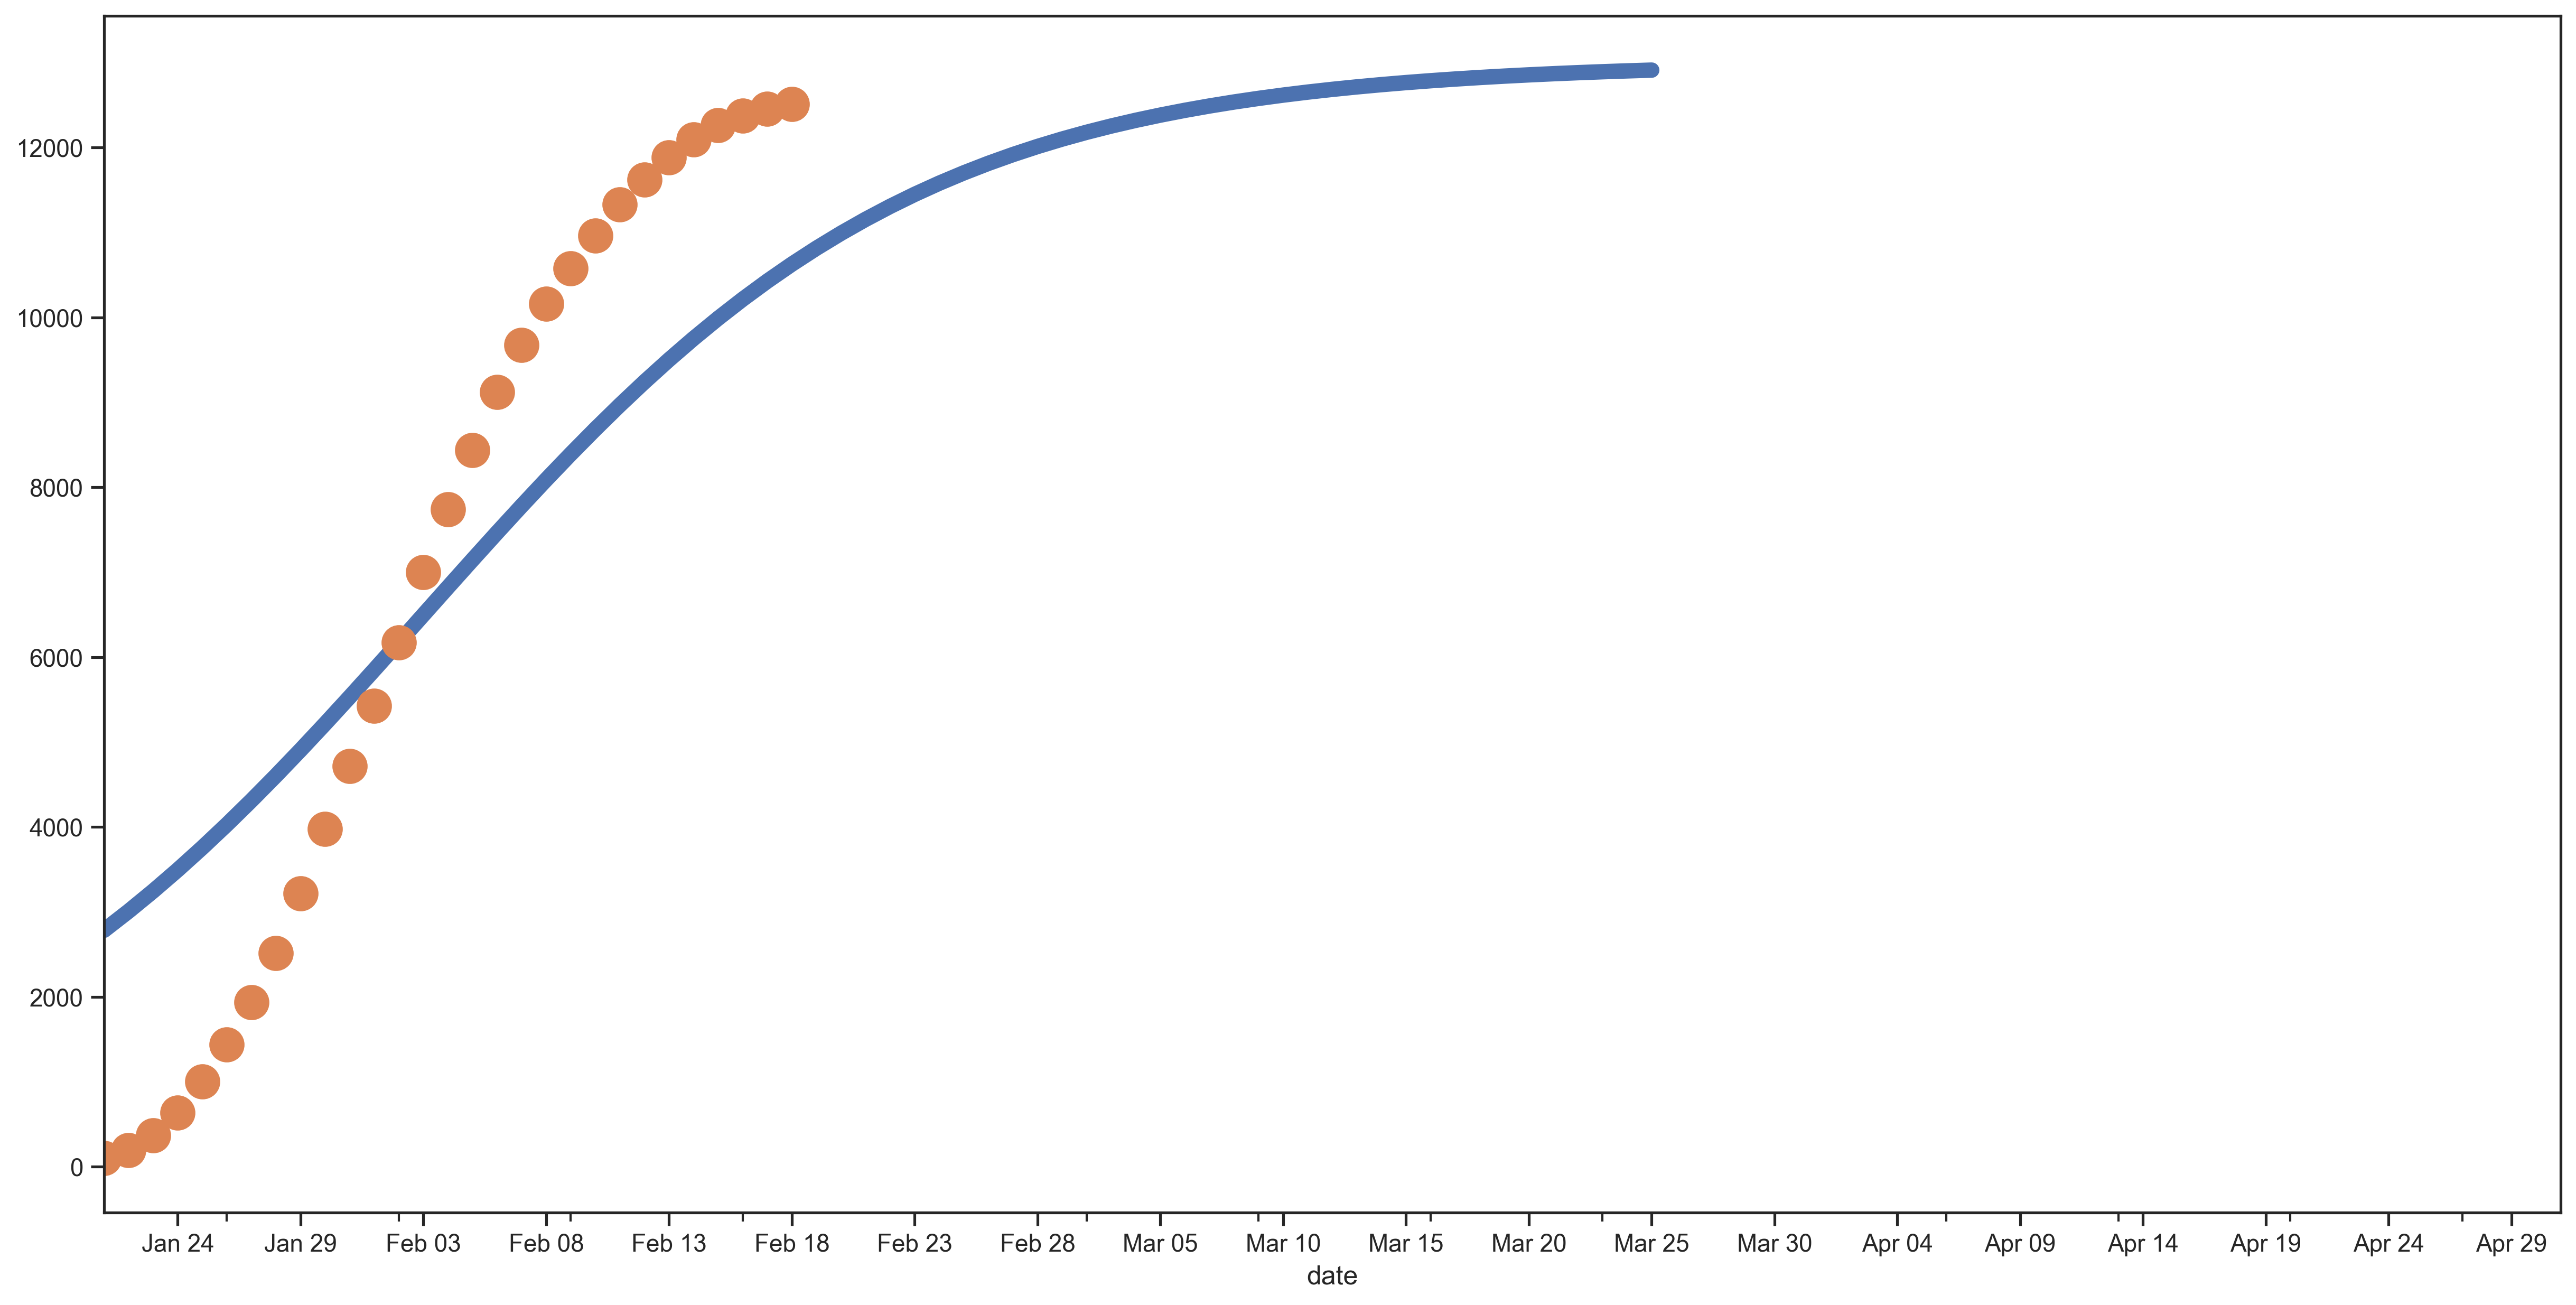

In [175]:
import matplotlib.dates as mdates
x = np.linspace(-day_range, day_range, day_range*2+1)
index_sig = pd.date_range('2020-01-22', periods= day_range*2+1)
X_sigmoid = pd.Series(sigmoid(x, 0.1) * max_cases)
X_sigmoid.index = index_sig
ax = X_sigmoid.shift(-37).plot(figsize=(20,10), linewidth=7)
X_non_hub.plot(style='o', ms=15)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))

#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

#plt.gcf().autofmt_xdate()